The Following Notebook represents the computational pipeline to produce each of the figures of the supplement. As such, it should remain in its appropriate folder and not be transferred to the folder of the main figures.

Some preliminary code is required to run all further analyses, marked at the top of the notebook.

The code required to generate the figures will be delineated with the name (Supplemental Figure X) Code below, with the code that produces each specific subfigure will be named (Supplemental Figure XN) Figure below


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

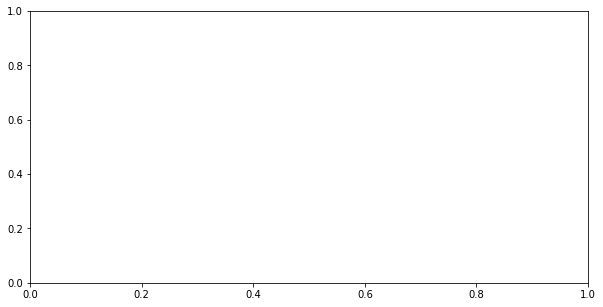

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib
import pydot
import pickle
import pathlib
import os
from scipy import stats
import random
from sklearn.metrics import r2_score
from sklearn.metrics import mutual_info_score

plt.rcParams['figure.figsize'] = [10, 5]
#import unicode

from scipy.optimize import curve_fit
import re
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import statistics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
import networkx as nx
from operator import itemgetter
from scipy.spatial import distance_matrix

from collections import Counter

from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

import seaborn
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from scipy.spatial import distance
plt.yticks(fontsize=10);plt.xticks(fontsize=10)

In [2]:
#directory = str(pathlib.Path(__file__).parent.resolve())
#script_path = str(pathlib.Path(__file__).parent.resolve())
directory = os.getcwd()
script_path = os.getcwd()
nameset,dictset = [],[]
refnameset,refdictset = [],[]

refsortset = []
sortset = []


for filename in os.listdir(directory):
    if filename.endswith(".txt") and '._' not in filename:
        if 'REF' not in filename:
            impath = os.path.join(directory, filename)
            nameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',') *1.25
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            dictset.append(this_set)
            sortset.append((impath, this_set))
        else:
            impath = os.path.join(directory, filename)
            refnameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',') *1.25
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            refdictset.append(this_set)
            refsortset.append((impath, this_set))
    
print(len(dictset),len(nameset))
print(len(refdictset),len(refnameset))
truncator = len(nameset)

nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(n[1])

refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(n[1])

1325 1325
30 30


In [3]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(35, 25)
    plt.show()

In [4]:
def remove_dangling_children(oldshi):
    poor = list(oldshi);dishi = dict()
    for n in range(1,len(poor)-1):
        if (len(poor[n]) == len(poor[n+1]) or len(poor[n]) == len(poor[n-1])) == False: dishi[poor[n]] = oldshi[poor[n]]
    return dishi

#'''
nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(remove_dangling_children(n[1]))
    
refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(remove_dangling_children(n[1]))
#'''

In [5]:
#part 1 of common node
refnodelist = set(refdictset[0])
for n in refdictset:
    refnodelist = set(n).intersection(refnodelist)

In [6]:
#part 2 of common node
newdictset = []
for n in refdictset:
    newdict = dict()
    for i in refnodelist:
        newdict[i] = n[i]
    #print(set(newdict).issubset(set(n)))
    #print(len(newdict))
    newdictset.append(newdict)

#print(set(newdict).issubset(set(n)))
refdictset = newdictset

In [7]:
def scramble(dict_list):
    dict_return = []
    for element in dict_list:
        valuescramble = list(element.values())
        random.shuffle(valuescramble)
        keyscramble = list(element)
        random.shuffle(keyscramble)
        new_element = dict()
        for n in range(0,len(keyscramble)):
            new_element[keyscramble[n]] = valuescramble[n]
        dict_return.append(new_element)
    return dict_return
def globalize(dictn):
    globaldictset = []
    for i in dictn:
        tags = sorted(list(i));dip = dict()
        for n in tags:
            if n[0:-1] in i:
                dip[n] = i[n] + dip[n[:-1]]
            else: dip[n] = i[n]    
        globaldictset.append(dip)
    return globaldictset

In [8]:
scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
refglobalscrambledictset = globalize(refscrambledictset)

In [9]:
qf = pd.read_csv('1368-embryos.csv', header=None).iloc[0]
df = pd.read_csv('1368-embryos.csv')
rdf = df.sort_values(by = 'embryo-ID')
cuttags = ['ABa','ABp','C','D','E','MS','P']
rearranger = [0,1,4,5,3,2,6]

match_links = []
match_links2 = []

findit = 0
notin = 0

o = 0
for n in range(0,df.shape[0]):
    #print(rdf.iloc[n][1] in nameset[o])
    if rdf.iloc[n][1] in nameset[o]:
        #match_links.append((o,n)) #, o in nameset, #n in dataframe
        match_links.append(n) #index is o in nameset, list value is n in dataframe
        tagref = 0
        for nm in list(globaldictset[o]):
            if cuttags[tagref] not in nm:
                try:
                    tagref = tagref + 1
                    if tagref > 6:
                        break
                except:
                    break
            #findit = findit + (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5])
            if (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5] * 1.25): 
                #print(nameset[o].split('/')[-1])
                #print(rdf.iloc[n][1])
                #print('tag',o,'embryo',n,nm,globaldictset[o][nm],rdf.iloc[n][rearranger[tagref]+5])
                del dictset[o][nm]
        o = o + 1
    else:
        pass
        match_links2.append((o,-1))
        #match_links2.append(-1)
o,n

(772, 1367)

In [10]:
scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
refglobalscrambledictset = globalize(refscrambledictset)

In [11]:
def tree_edit_distance(dict1,dict2): return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))

def branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

def jaccard_distance(dict1,dict2):
    onion = len(set(dict1).union(set(dict2)))
    entry = len(set(dict1).intersection(set(dict2)))
    #print((onion - len(set(dict1).intersection(set(dict2)))) / onion)
    return ((onion - len(set(dict1).intersection(set(dict2)))) / onion)
    #return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))

In [12]:
def variable_nodes(dict1,root_node):
    tip = dict()
    for n in [x for x in dict1 if re.search(root_node, x)]: tip[n] = dict1[n]
    return tip

In [13]:
def node_comparison_trimmer(dict0,root_node):
    dict1 = dict(dict0)
    tip = dict()
    if root_node == 'EMS':
        root_node = 'Q'
        for n in [x for x in dict1 if re.search('E', x) or re.search('MS', x)]:
            if n == 'EMS':
                dict1['Q'] = dict1[n]
            if n[0] == 'E':
                dict1['Qp'+n[1:]] = dict1[n]
            elif n == 'MS' : dict1['Qp'] = dict1['MS']
            else:
                dict1['Qa'+n[2:]] = dict1[n]
    elif root_node == 'P2':
        root_node = 'Q'
        try:
            dict1['P3'] = dict1['Ql']
        except:
            pass
        for n in [x for x in dict1 if re.search('C', x) or re.search('D', x)]:
            if n[0] == 'C':
                dict1['Qr'+n[1:]] = dict1[n]
            else:
                dict1['Qrr'+n[1:]] = dict1[n]
    elif root_node == 'P3':
        root_node = 'Q'
        try:
            dict1['P4'] = dict1['Ql']
        except:
            pass
        for n in [x for x in dict1 if re.search('D', x)]:
            dict1['Qr'+n[1:]] = dict1[n]
    for n in [x for x in dict1 if re.search(root_node, x)]: 
        m = n.replace('r', "p").replace('v', "p")
        m = m.replace('d', "a").replace('l', "a")
        m = m[len(root_node):]
        tip[m] = dict1[n]
    return tip

In [14]:
def novel_two_sample_permutation_test(list1,list2,its):
    ref_list = sorted([list1,list2], key = len)
    list1 = ref_list[0];list2 = ref_list[1]
    len1 = len(list1);len2 = len(list2)
    list1,list2 = np.array(list1),np.array(list2)
    reference_mean = np.mean(list1) - np.mean(list2)
    hist_list = []
    for n in range(0,its):
        pop15 = random.sample(range(0, len2), len1)
        full_list = np.concatenate((list1,list2[pop15]), axis=None)
        pop1 = random.sample(range(0, len(full_list)), len1);
        #print(pop1)
        pop2 = list(set(range(0, len(full_list))) - set(pop1))
        #print(pop2)
        resamp_mean = np.mean(full_list[pop1]) - np.mean(full_list[pop2])
        hist_list.append(resamp_mean)
    #plt.hist(hist_list)
    hist_list = np.array(hist_list)
    if reference_mean < 0:
        p = np.sum(hist_list <= reference_mean)/its
    else:
        p = np.sum(hist_list >= reference_mean)/its
    return p

In [15]:
def subtree_comparison_to_WT(WT_dict,RNAi_dict, root):
    reference = node_comparison_trimmer(RNAi_dict,root); huld = []
    for n in root_cells_comp:
        huld.append(branch_distance(reference, node_comparison_trimmer(WT_dict,n)))
    return np.array(huld)

def self_comp(imp_mat):
    imp_mat = np.mat(imp_mat)
    imp_mat = np.tril(np.array(imp_mat)).flatten()
    imp_mat = imp_mat[np.where(imp_mat != 0.0)]
    return (imp_mat)


def out_comp(imp_mat):
    imp_mat = np.mat(imp_mat)
    sample_size = int((min(imp_mat.shape) ** 2 - min(imp_mat.shape)) / 2)
    samples = np.random.choice(imp_mat.flatten().tolist()[0], sample_size)
    return ('mu',np.mean(samples),'var',np.var(samples))

def out_comp(imp_mat):
    imp_mat = np.mat(imp_mat)
    sample_size = int((min(imp_mat.shape) ** 2 - min(imp_mat.shape)) / 2)
    samples = np.random.choice(imp_mat.flatten().tolist()[0], sample_size)
    return ('mu',np.mean(samples),'var',np.var(samples))

In [16]:
fullnameset = refnameset + nameset
fulldictset = refdictset + dictset

'''

scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
refglobalscrambledictset = globalize(refscrambledictset)'''

'\n\nscrambledictset = scramble(dictset)\nglobaldictset = globalize(dictset)\nglobalscrambledictset = globalize(scrambledictset)\n\nrefscrambledictset = scramble(refdictset)\nrefglobaldictset = globalize(refdictset)\nrefglobalscrambledictset = globalize(refscrambledictset)'

In [17]:
root_cells_comp = ['ABa', 'ABp', 'ABal', 'ABar', 'ABpl', 'ABpr', 'ABala', 'ABalp', 'ABara', 'ABarp', 'ABpla', 'ABplp', 'ABpra', 'ABprp', 'EMS', 'P2', 'MS', 'E', 'C', 'P3', 'D']
inlier_ref = [0,2,3,4,5,6,7,11,12,13,14,15,16,18,21,22,23,24,25,27,28,29]

In [18]:
with open('RNAi_name_array.pickle', 'rb') as handle:
    RNAi_name_array = pickle.load(handle)

In [19]:
subtree_dict_list = []
for n in fulldictset:
    pack = dict()
    for m in root_cells_comp:
        pack[m] = len(node_comparison_trimmer(n,m))
    subtree_dict_list.append(pack)

In [20]:
RNAi_size_assignments = {'inlierWT': [0,2,3,4,5,6,7,11,12,13,14,15,16,18,21,22,23,24,25,27,28,29],
 'outlierWT': [1, 8, 9, 10, 17, 19, 20, 26],
 'ABI-1': [30, 31, 32, 33, 34, 35],
 'AMA-1': [36, 37, 38, 39, 40, 41],
 'AOS-1': [42, 43, 44, 45, 46, 47],
 'APR-1': [48, 49, 50, 51, 52, 53],
 'APX-1': [54, 55, 56, 57, 58, 59, 60, 61],
 'ARX-2': [62, 63, 64, 65, 66, 67],
 'ATX-2': [68, 69, 70, 71],
 'BUB-1': [72, 73, 74, 75, 76, 77],
 'C01A2.5': [78, 79, 80, 81, 82, 83],
 'C01F1.1': [84, 85, 86, 87, 88],
 'C02B10.5': [89, 90, 91, 92, 93, 94, 95],
 'C06A5.1': [96, 97, 98, 99, 100, 101, 102],
 'C07A9.2': [103, 104, 105, 106, 107, 108],
 'C08B11.3': [109, 110, 111, 112, 113, 114, 115],
 'C49H3.8': [116, 117, 118, 119, 120],
 'C50F2.3': [121, 122, 123, 124, 125, 126],
 'C55A6.9': [127, 128, 129, 130, 131, 132, 133],
 'CACN-1': [134, 135, 136, 137, 138, 139, 140, 141],
 'CAMT-1': [142, 143, 144, 145, 146],
 'CBP-1': [147, 148, 149, 150, 151, 152, 153],
 'CDC-25.1': [154, 155, 156, 157, 158, 159, 160],
 'CDC-37': [161, 162, 163, 164, 165, 166, 167, 168],
 'CDK-7': [169, 170, 171, 172, 173, 174, 175],
 'CDK-9': [176, 177, 178, 179, 180, 181],
 'CDT-1': [182, 183, 184, 185, 186, 187, 188],
 'CEH-24': [189, 190, 191, 192, 193, 194],
 'CHAF-2': [195, 196, 197, 198, 199, 200, 201],
 'CHC-1': [202, 203, 204, 205, 206, 207],
 'CHK-1': [208, 209, 210, 211, 212, 213, 214],
 'CIR-1': [215, 216, 217, 218, 219, 220],
 'CLPF-1': [221, 222, 223, 224, 225, 226],
 'CLS-2': [227, 228, 229, 230, 231, 232],
 'CMD-1': [233, 234, 235, 236, 237],
 'CPL-1': [238, 239, 240, 241, 242, 243, 244],
 'CPSF-1': [245, 246, 247, 248, 249, 250],
 'CPSF-2': [251, 252, 253, 254, 255, 256],
 'CPSF-4': [257, 258, 259, 260, 261, 262],
 'CSN-4': [263, 264, 265, 266, 267],
 'CUL-1': [268, 269, 270, 271, 272, 273, 274, 275, 276, 277],
 'CUL-2': [278, 279, 280, 281, 282, 283, 284, 285, 286],
 'CUL-3': [287, 288, 289, 290],
 'D1043.1': [291, 292, 293, 294, 295, 296],
 'D1054.14': [297, 298, 299, 300, 301, 302],
 'D1081.8': [303, 304, 305, 306, 307, 308, 309, 310],
 'D2096.8': [311, 312, 313, 314, 315],
 'DDX-23': [316, 317, 318, 319, 320, 321],
 'DIC-1': [322, 323, 324, 325, 326, 327, 328, 329, 330],
 'DIE-1': [331, 332, 333, 334, 335, 336, 337, 338],
 'DIV-1': [339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350],
 'DLC-1': [351, 352, 353, 354, 355],
 'DLI-1': [356, 357, 358, 359, 360, 361, 362],
 'DRH-3': [363, 364, 365, 366, 367, 368, 369, 370, 371, 372],
 'EGO-1': [373, 374, 375, 376, 377, 378, 379, 380, 381],
 'ELB-1': [382, 383, 384, 385, 386, 387, 388],
 'ELT-1': [389, 390, 391, 392, 393, 394],
 'EMB-5': [395, 396, 397, 398, 399, 400],
 'ETR-1': [401, 402, 403, 404, 405, 406, 407],
 'F19F10.9': [408, 409, 410, 411, 412, 413],
 'F20D12.2': [414, 415, 416, 417, 418, 419],
 'F23F1.5': [420, 421, 422, 423, 424, 425, 426],
 'F25B3.6': [427, 428, 429, 430, 431, 432],
 'F31C3.5': [433, 434, 435, 436, 437, 438, 439],
 'F35F11.1': [440, 441, 442, 443, 444, 445],
 'F37C12.1': [446, 447, 448, 449, 450],
 'F43E2.7': [451, 452, 453, 454, 455, 456, 457],
 'F43G9.12': [458, 459, 460, 461, 462, 463],
 'F44B9.8': [464, 465, 466, 467, 468, 469, 470],
 'F53B7.3': [471, 472, 473, 474, 475, 476, 477],
 'F55A3.7': [478, 479, 480, 481, 482, 483],
 'GAD-1': [484, 485, 486, 487, 488, 489, 490, 491, 492],
 'GEI-11': [493, 494, 495, 496, 497, 498],
 'GEI-17': [499, 500, 501, 502, 503, 504],
 'GLD-2': [505, 506, 507, 508, 509, 510, 511, 512, 513],
 'GLP-1': [514, 515, 516, 517, 518, 519, 520, 521],
 'GOP-2': [522, 523, 524, 525, 526, 527],
 'GPB-1': [528, 529, 530, 531, 532],
 'GSK-3': [533, 534, 535, 536, 537, 538, 539, 540, 541, 542],
 'HDA-1': [543, 544, 545, 546, 547, 548],
 'HEL-1': [549, 550, 551, 552, 553, 554],
 'HIM-10': [555, 556, 557, 558, 559, 560],
 'HIS-9': [561, 562, 563, 564, 565, 566],
 'HMP-2': [567, 568, 569, 570, 571, 572],
 'IMB-2': [573, 574, 575, 576, 577, 578],
 'K07C5.6': [579, 580, 581, 582, 583, 584],
 'KLP-10': [585, 586, 587, 588, 589, 590],
 'KLP-15': [591, 592, 593, 594, 595, 596, 597, 598],
 'KLP-16': [599, 600, 601, 602, 603, 604],
 'LAG-1': [605, 606, 607, 608, 609, 610, 611, 612],
 'LET-413': [613, 614, 615, 616, 617, 618],
 'LET-502': [619, 620, 621, 622, 623, 624],
 'LET-526': [625, 626, 627, 628, 629, 630],
 'LET-711': [631, 632, 633, 634, 635, 636, 637],
 'LIG-1': [638, 639, 640, 641, 642, 643, 644],
 'LIN-23': [645, 646, 647, 648, 649, 650, 651, 652],
 'LIN-26': [653, 654, 655, 656, 657],
 'LIN-53': [658, 659, 660, 661, 662, 663, 664],
 'LIT-1': [665, 666, 667, 668, 669, 670],
 'LRR-1': [671, 672, 673, 674, 675, 676, 677, 678, 679, 680],
 'M03C11.7': [681, 682, 683, 684, 685, 686],
 'MBK-2': [687, 688, 689, 690, 691, 692],
 'MDT-19': [693, 694, 695, 696, 697, 698, 699],
 'MDT-6': [700, 701, 702, 703, 704, 705],
 'MEI-1': [706, 707, 708, 709, 710, 711],
 'MEX-3': [712, 713, 714, 715, 716, 717, 718, 719],
 'MEX-5': [720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730],
 'MOG-4': [731, 732, 733, 734, 735],
 'MOG-5': [736, 737, 738, 739, 740, 741],
 'MOM-2': [742, 743, 744, 745, 746, 747, 748, 749],
 'MOM-5': [750, 751, 752, 753, 754, 755, 756, 757, 758],
 'NMY-2': [759, 760, 761, 762, 763, 764],
 'NPP-1': [765, 766, 767, 768, 769, 770, 771],
 'NPP-2': [772, 773, 774, 775, 776, 777],
 'NPP-4': [778, 779, 780, 781, 782, 783, 784],
 'NPP-6': [785, 786, 787, 788, 789],
 'NPP-8': [790, 791, 792, 793, 794, 795],
 'NUD-1': [796, 797, 798, 799, 800, 801],
 'OMA-1/2': [802, 803, 804, 805, 806, 807, 808],
 'PABP-2': [809, 810, 811, 812, 813, 814, 815],
 'PAD-1': [816, 817, 818, 819, 820, 821, 822],
 'PAL-1': [823, 824, 825, 826, 827, 828],
 'PAR-1': [829, 830, 831, 832, 833, 834],
 'PAR-2': [835, 836, 837, 838, 839, 840],
 'PAR-3': [841, 842, 843, 844, 845, 846],
 'PAR-5': [847],
 'PAR-6': [848, 849, 850, 851, 852],
 'PCN-1': [853, 854, 855, 856, 857, 858],
 'PIE-1': [859, 860, 861, 862, 863, 864],
 'PKC-3': [865],
 'POP-1': [866, 867, 868, 869, 870, 871],
 'POS-1': [872, 873, 874, 875, 876, 877],
 'PPFR-4': [878, 879, 880, 881, 882, 883],
 'PRP-17': [884, 885, 886, 887, 888, 889],
 'PUF-3': [890, 891, 892, 893, 894, 895, 896, 897],
 'R05H5.3': [898, 899, 900, 901, 902, 903],
 'R08D7.1': [904, 905, 906, 907, 908, 909],
 'R11A8.2': [910, 911, 912, 913, 914],
 'R144.2': [915, 916, 917, 918, 919, 920, 921, 922],
 'RAB-5': [923, 924, 925, 926, 927, 928],
 'RAB-7': [929, 930, 931, 932, 933, 934],
 'RAD-51': [935, 936, 937, 938, 939, 940, 941],
 'RAN-4': [942, 943, 944, 945],
 'RBA-1': [946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956],
 'RBX-1': [957, 958, 959, 960, 961, 962],
 'REPO-1': [963, 964, 965, 966, 967, 968, 969],
 'REV-1': [970, 971, 972, 973, 974, 975],
 'RFC-3': [976, 977, 978, 979, 980, 981, 982],
 'RGA-3': [983, 984, 985, 986, 987, 988],
 'RGR-1': [989, 990, 991, 992, 993, 994],
 'RNF-113': [995, 996, 997, 998, 999, 1000],
 'RNP-4': [1001, 1002, 1003, 1004, 1005, 1006],
 'RNP-7': [1007, 1008, 1009, 1010, 1011],
 'RPB-11': [1012, 1013, 1014, 1015, 1016, 1017],
 'RPB-5': [1018, 1019, 1020, 1021, 1022, 1023],
 'RPB-7': [1024, 1025, 1026, 1027, 1028, 1029],
 'RPB-8': [1030, 1031, 1032, 1033, 1034, 1035],
 'RUVB-1': [1036, 1037, 1038, 1039, 1040, 1041],
 'SAP-49': [1042, 1043, 1044, 1045, 1046, 1047],
 'SCC-3': [1048, 1049, 1050, 1051, 1052, 1053],
 'SEL-8': [1054, 1055, 1056, 1057, 1058, 1059, 1060],
 'SEX-1': [1061, 1062, 1063, 1064, 1065, 1066],
 'SKN-1': [1067, 1068, 1069, 1070, 1071, 1072, 1073],
 'SKP-1': [1074, 1075, 1076, 1077, 1078, 1079],
 'SKR-2': [1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089],
 'SMO-1': [1090, 1091, 1092, 1093, 1094, 1095],
 'SPG-7': [1096, 1097, 1098, 1099, 1100, 1101],
 'SPN-4': [1102, 1103, 1104, 1105, 1106, 1107],
 'SPT-5': [1108, 1109, 1110, 1111, 1112, 1113],
 'SRC-1': [1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121],
 'SUF-1': [1122, 1123, 1124, 1125, 1126, 1127],
 'SUR-6': [1128, 1129, 1130, 1131, 1132, 1133],
 'SYN-13': [1134, 1135, 1136, 1137, 1138, 1139],
 'SYS-1': [1140, 1141, 1142, 1143, 1144, 1145, 1146],
 'T04A8.7': [1147, 1148, 1149, 1150, 1151],
 'T09A5.9': [1152, 1153, 1154, 1155, 1156],
 'T10F2.4': [1157, 1158, 1159, 1160, 1161, 1162],
 'T11G6.8': [1163, 1164, 1165, 1166, 1167, 1168, 1169],
 'T13H5.5': [1170, 1171, 1172, 1173, 1174],
 'T22F3.3': [1175, 1176, 1177, 1178, 1179, 1180],
 'T24C4.5': [1181, 1182, 1183, 1184, 1185, 1186],
 'TAF-12': [1187, 1188, 1189, 1190, 1191, 1192],
 'TAF-5': [1193, 1194, 1195, 1196, 1197, 1198],
 'TAG-135': [1199, 1200, 1201, 1202, 1203, 1204],
 'TAG-203': [1205, 1206, 1207, 1208, 1209, 1210],
 'TAG-214': [1211, 1212, 1213, 1214, 1215, 1216],
 'TAG-256': [1217, 1218, 1219, 1220, 1221, 1222, 1223],
 'TAG-335': [1224, 1225, 1226, 1227, 1228, 1229],
 'TAT-5': [1230, 1231, 1232, 1233, 1234, 1235, 1236],
 'TBX-33': [1237, 1238, 1239, 1240, 1241, 1242, 1243],
 'TSR-1': [1244, 1245, 1246, 1247, 1248, 1249],
 'UBA-1': [1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258],
 'UBC-12': [1259, 1260, 1261, 1262, 1263, 1264, 1265],
 'UBC-9': [1266, 1267, 1268, 1269, 1270, 1271, 1272],
 'VAB-10': [1273, 1274, 1275, 1276, 1277, 1278],
 'VPS-32.1': [1279, 1280, 1281, 1282, 1283, 1284, 1285],
 'VPS-4': [1286, 1287, 1288, 1289, 1290, 1291],
 'WWP-1': [1292, 1293, 1294, 1295, 1296, 1297, 1298],
 'XPO-1': [1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306],
 'Y110A7A.8': [1307, 1308, 1309, 1310, 1311, 1312],
 'Y48G10A.4': [1313, 1314, 1315, 1316, 1317, 1318],
 'Y52B11A.9': [1319, 1320, 1321, 1322, 1323, 1324],
 'Y53F4B.22': [1325, 1326, 1327, 1328, 1329, 1330],
 'Y71H2AM.17': [1331, 1332, 1333, 1334, 1335, 1336],
 'ZYG-11': [1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344],
 'ZYG-12': [1345, 1346, 1347, 1348, 1349, 1350, 1351]}

root_cells_comp_inflated = np.array(['ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa',
       'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa',
       'ABa', 'ABa', 'ABa', 'ABa', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp',
       'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp',
       'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABal',
       'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABal',
       'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABal',
       'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABar', 'ABar', 'ABar',
       'ABar', 'ABar', 'ABar', 'ABar', 'ABar', 'ABar', 'ABar', 'ABar',
       'ABar', 'ABar', 'ABar', 'ABar', 'ABar', 'ABar', 'ABar', 'ABar',
       'ABar', 'ABar', 'ABar', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl',
       'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl',
       'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl',
       'ABpl', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr',
       'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr',
       'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABala',
       'ABala', 'ABala', 'ABala', 'ABala', 'ABala', 'ABala', 'ABala',
       'ABala', 'ABala', 'ABala', 'ABala', 'ABala', 'ABala', 'ABala',
       'ABala', 'ABala', 'ABala', 'ABala', 'ABala', 'ABala', 'ABala',
       'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp',
       'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp',
       'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp',
       'ABalp', 'ABara', 'ABara', 'ABara', 'ABara', 'ABara', 'ABara',
       'ABara', 'ABara', 'ABara', 'ABara', 'ABara', 'ABara', 'ABara',
       'ABara', 'ABara', 'ABara', 'ABara', 'ABara', 'ABara', 'ABara',
       'ABara', 'ABara', 'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp',
       'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp',
       'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp',
       'ABarp', 'ABarp', 'ABarp', 'ABpla', 'ABpla', 'ABpla', 'ABpla',
       'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABpla',
       'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABpla',
       'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABplp', 'ABplp', 'ABplp',
       'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp',
       'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp',
       'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABpra', 'ABpra',
       'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra',
       'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra',
       'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABprp',
       'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp',
       'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp',
       'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp',
       'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS',
       'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS',
       'EMS', 'EMS', 'EMS', 'EMS', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2',
       'P2', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2',
       'P2', 'P2', 'P2', 'P2', 'P2', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS',
       'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS',
       'MS', 'MS', 'MS', 'MS', 'MS', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'P3', 'P3',
       'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3',
       'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D'], dtype='<U5')

In [21]:
def union_branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    merged = dict1 | dict2
    for n in list(merged):
        #print(n)
        try:
            #print(dict1[n],dict2[n])
            branch_dist += (dict1[n] - dict2[n])**2
        except:
            #print(merged[n], 0)
            branch_dist += (merged[n])**2
            pass
        #branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

In [22]:
def intersection_branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

(Supplemental Figure 2) Code below

In [24]:
def dict_to_vector(first):
    flist = []; #slist = []
    for n in first:
        #print(first[n], second[n])
        flist.append(first[n])#, slist.append(second[n])
    return flist#,slist

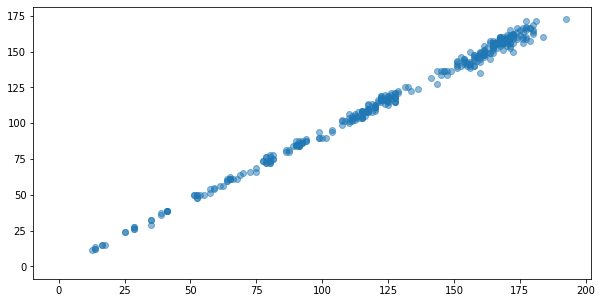

In [25]:
plt.scatter(dict_to_vector(refglobaldictset[0]),dict_to_vector(refglobaldictset[1]), alpha = 0.5)
plt.scatter(0,0, c = "w")

(Supplemental Figure 2B) Figure below

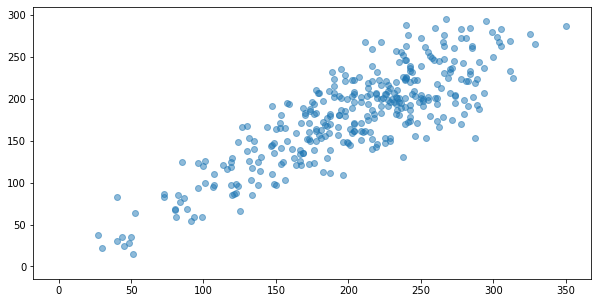

In [26]:
plt.scatter(dict_to_vector(refglobalscrambledictset[0]),dict_to_vector(refglobalscrambledictset[1]), alpha = 0.5)
plt.scatter(0,0, c = "w")

(Supplemental Figure 2C) Figure below

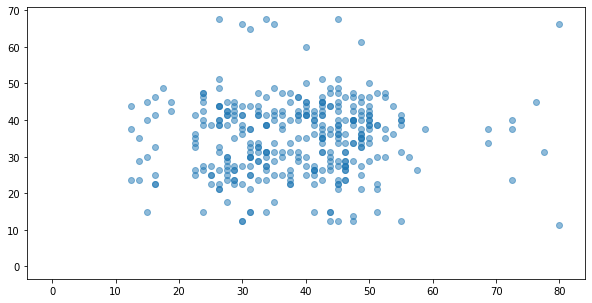

In [27]:

plt.scatter(dict_to_vector(refscrambledictset[0]),dict_to_vector(refscrambledictset[1]), alpha = 0.5)
plt.scatter(0,0, c = "w")

(Supplemental Figure 2D) Figure below

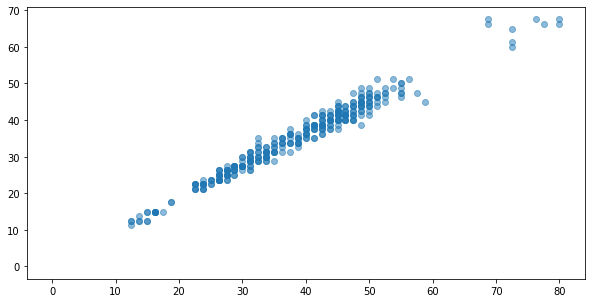

In [28]:
plt.scatter(dict_to_vector(fulldictset[0]),dict_to_vector(fulldictset[1]), alpha = 0.5)
plt.scatter(0,0, c = "w")

In [29]:
def dict_PCA_img(name,lis,x,y):
    xaxis = [];yaxis = []
    for n in (list(set(lis[x]).intersection(set(lis[y])))):
        #print(n,lis[x][n],lis[y][n])
        xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    name1,name2 = name1[18:-7],name2[18:-7]
    
    points = np.array([xaxis,yaxis]).T
    pca = PCA(n_components=2)
    
    pca.fit(points)
    
    
    xaxis = np.array(xaxis);yaxis = np.array(yaxis)
    xData = xaxis; yData = yaxis
    
    xData = np.reshape(xData, (len(xData), 1))
    yData = np.reshape(yData, (len(yData), 1))
    
    data = np.hstack((xData, yData))

    mu = data.mean(axis=0)
    data = data - mu
    # data = (data - mu)/data.std(axis=0)  # Uncommenting this reproduces mlab.PCA results
    eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
    eigenvectors = pca.components_; eigenvalues = pca.explained_variance_;
    projected_data = np.dot(data, eigenvectors)
    sigma = projected_data.std(axis=0).mean()
    #print(eigenvectors)

    fig, ax = plt.subplots()
    ax.scatter(xData, yData, label= 'placeholder', s =  50 , alpha = .55)
    keeper = 0
    #sigma = sigma*3
    for axis in eigenvectors:
        #start, end = mu, mu + np.multiply(eigenvalues, axis)#sigma * axis
        #if keeper == 1: sigma = sigma / 3
        start, end = mu, mu + sigma * axis
        keeper = 1
        ax.annotate(
            '', xy=end, xycoords='data',
            xytext=start, textcoords='data',
            arrowprops=dict(facecolor='red', width=2.0), label = 'trot')
    ax.set_aspect('equal')
    
    plt.title('Embryonic Timing Discrepancies between '+name1+' &\n'+name2+' Common Nodes')
    plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    
    ax.legend(loc='upper left', shadow=True)
    #plt.figure(figsize = (15,8))
    #ax.scatter(xData, yData, label= 'etqetqt', s =  30 , alpha = .55)
    plt.show()
    
    print(pca.components_,pca.explained_variance_,'\n',eigenvectors[0][1]/eigenvectors[0][0] )
    #np.vstack([points, np.array(yaxis)])
    
    #print(len(list(set(lis[x]).intersection(set(lis[y])))))



In [30]:
#dict_PCA_img(fullnameset,fulldictset,2,10);dict_PCA_img(fullnameset,refscrambledictset,2,10)

In [31]:
def dict_PCA_img(name,lis,x,y):
    xaxis = [];yaxis = []
    for n in (list(set(lis[x]).intersection(set(lis[y])))):
        #print(n,lis[x][n],lis[y][n])
        xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    name1,name2 = name1[18:-7],name2[18:-7]
    
    points = np.array([xaxis,yaxis]).T
    pca = PCA(n_components=2)
    
    pca.fit(points)
    
    
    xaxis = np.array(xaxis);yaxis = np.array(yaxis)
    xData = xaxis; yData = yaxis
    
    xData = np.reshape(xData, (len(xData), 1))
    yData = np.reshape(yData, (len(yData), 1))
    
    data = np.hstack((xData, yData))

    mu = data.mean(axis=0)
    data = data - mu
    # data = (data - mu)/data.std(axis=0)  # Uncommenting this reproduces mlab.PCA results
    eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
    eigenvectors = pca.components_; eigenvalues = pca.explained_variance_;
    projected_data = np.dot(data, eigenvectors)
    sigma = projected_data.std(axis=0).mean()
    #print(eigenvectors)

    fig, ax = plt.subplots()
    ax.scatter(xData, yData, label= 'placeholder', s =  50 , alpha = .55)
    keeper = 0
    #sigma = sigma*3
    '''
    for axis in eigenvectors:
        #start, end = mu, mu + np.multiply(eigenvalues, axis)#sigma * axis
        #if keeper == 1: sigma = sigma / 3
        start, end = mu, mu + sigma * axis
        keeper = 1
        ax.annotate(
            '', xy=end, xycoords='data',
            xytext=start, textcoords='data',
            arrowprops=dict(facecolor='red', width=2.0), label = 'trot')
    '''
    #ax.set_aspect('equal')
    plt.rcParams['figure.figsize'] = [7, 7]
    plt.xlim([0, max(max(xData), max(yData)) + 5])
    plt.ylim([0, max(max(xData), max(yData)) + 5])
    
    #plt.title('Embryonic Timing Discrepancies between '+name1+' &\n'+name2+' Common Nodes')
    #plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    
    #ax.legend(loc='upper left', shadow=True)
    #plt.figure(figsize = (15,8))
    #ax.scatter(xData, yData, label= 'etqetqt', s =  30 , alpha = .55)
    plt.savefig("filepath.svg", format = 'svg', dpi=300)
    plt.show()
    
    print(pca.components_,pca.explained_variance_,'\n',eigenvectors[0][1]/eigenvectors[0][0] )
    #np.vstack([points, np.array(yaxis)])
    
    #print(len(list(set(lis[x]).intersection(set(lis[y])))))



In [32]:
def dict_PCA(lis,x,y):
    xaxis = [];yaxis = []
    for n in (list(set(lis[x]).intersection(set(lis[y])))):
        xaxis.append(lis[x][n]);yaxis.append(lis[y][n]) 
    points = np.array([xaxis,yaxis]).T; pca = PCA(n_components=2); pca.fit(points)
    eigenvectors = pca.components_; eigenvalues = pca.explained_variance_;
    return eigenvectors[0][1]/eigenvectors[0][0]

dict_PCA(fulldictset,1,10)

1.0077262501461632

In [33]:
def dict_to_vector(first,second):
    flist = []; slist = []
    for n in set(first).union(second):
        #print(first[n], second[n])
        flist.append(first[n]), slist.append(second[n])
    return flist,slist

(Supplemental Figure 3) Code below

In [34]:
full_WT_comp = []; full_r_comp = []; full_PCA_comp = [];
for n in range(0,30):
    temp_WT_comp = []; temp_r_comp = []; temp_PCA_comp = [];
    for mm in range(0,30):
        temp_WT_comp.append(branch_distance(fulldictset[n],fulldictset[mm]))
        x,y = dict_to_vector(fulldictset[n],fulldictset[mm])
        m, b, r, p_value, std_err = stats.linregress(x,y)
        temp_r_comp.append(r)
        temp_PCA_comp.append(dict_PCA(fulldictset,n,mm))
    full_WT_comp.append(temp_WT_comp)
    full_r_comp.append(temp_r_comp)
    full_PCA_comp.append(temp_PCA_comp)
full_WT_comp = np.mat(full_WT_comp)
full_r_comp = np.mat(full_r_comp)
#full_PCA_comp = np.log(np.array(full_PCA_comp))

In [35]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    #plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(35, 25)
    #plt.savefig("filepath.svg", format = 'svg', dpi=300)
    #
    #
    plt.show()

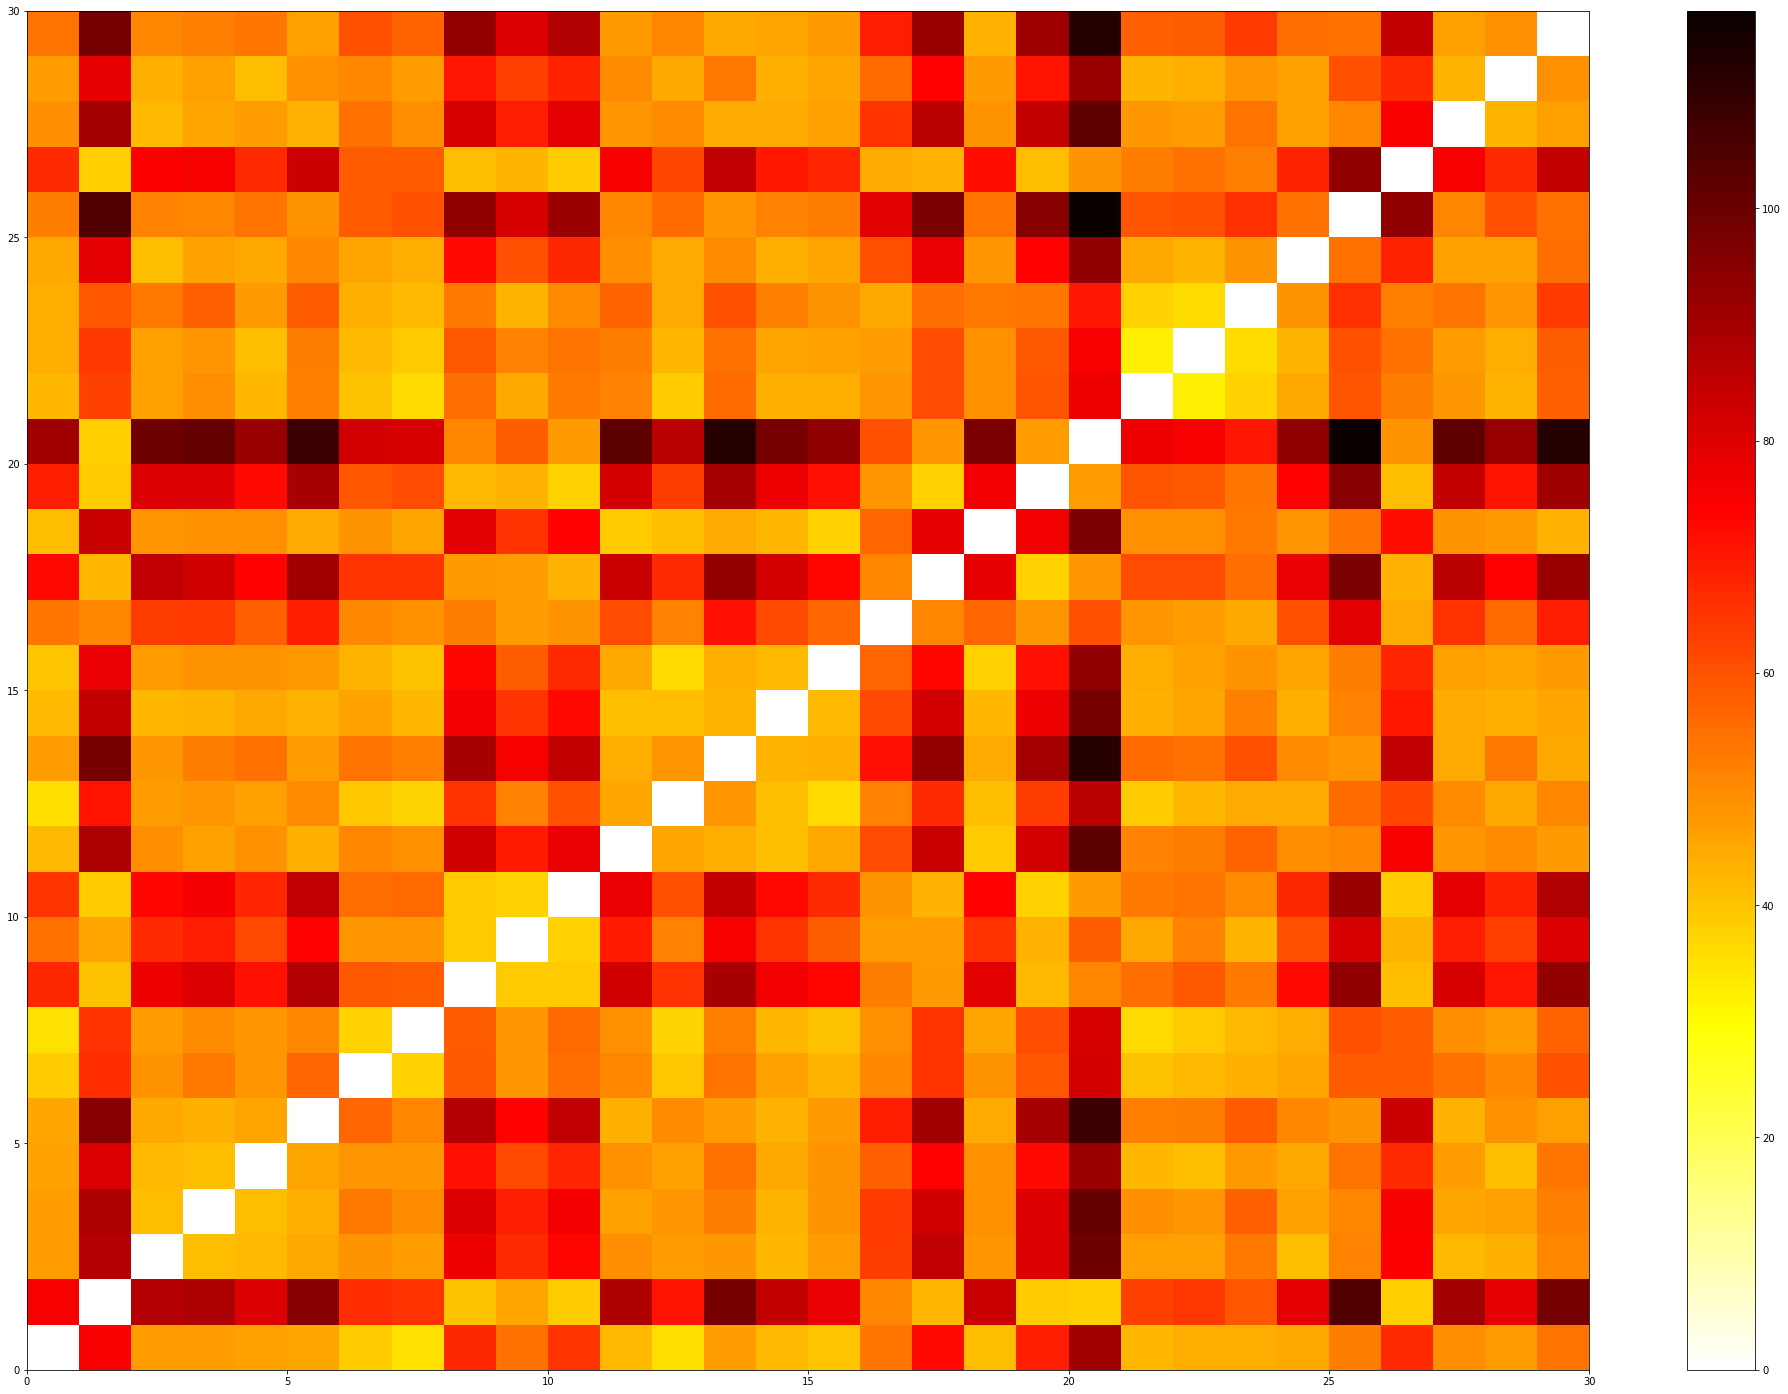

In [36]:
plot_2_examples(['hot_r'],full_WT_comp)

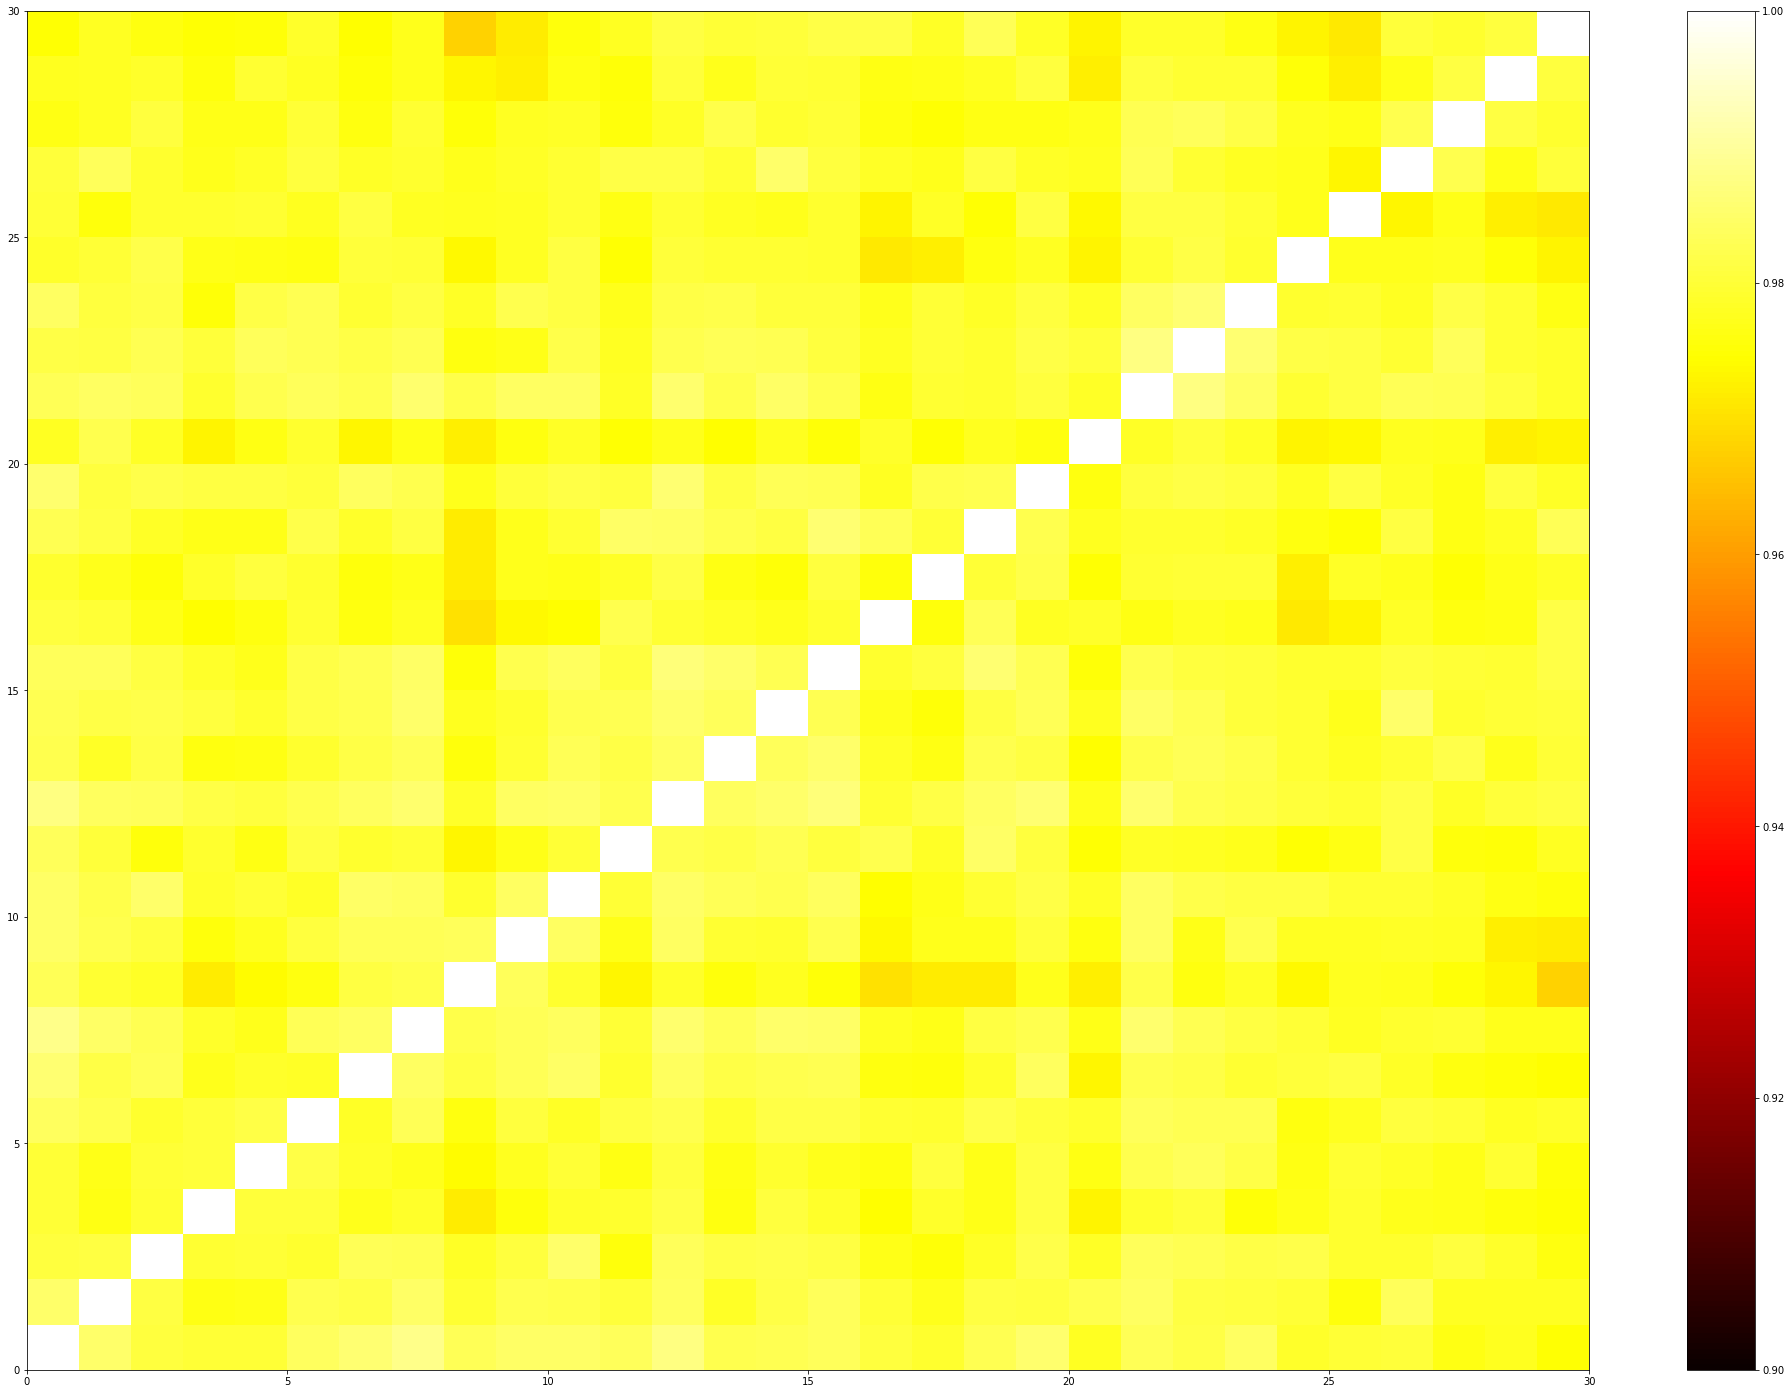

In [37]:
plot_2_examples(['hot'],full_r_comp)

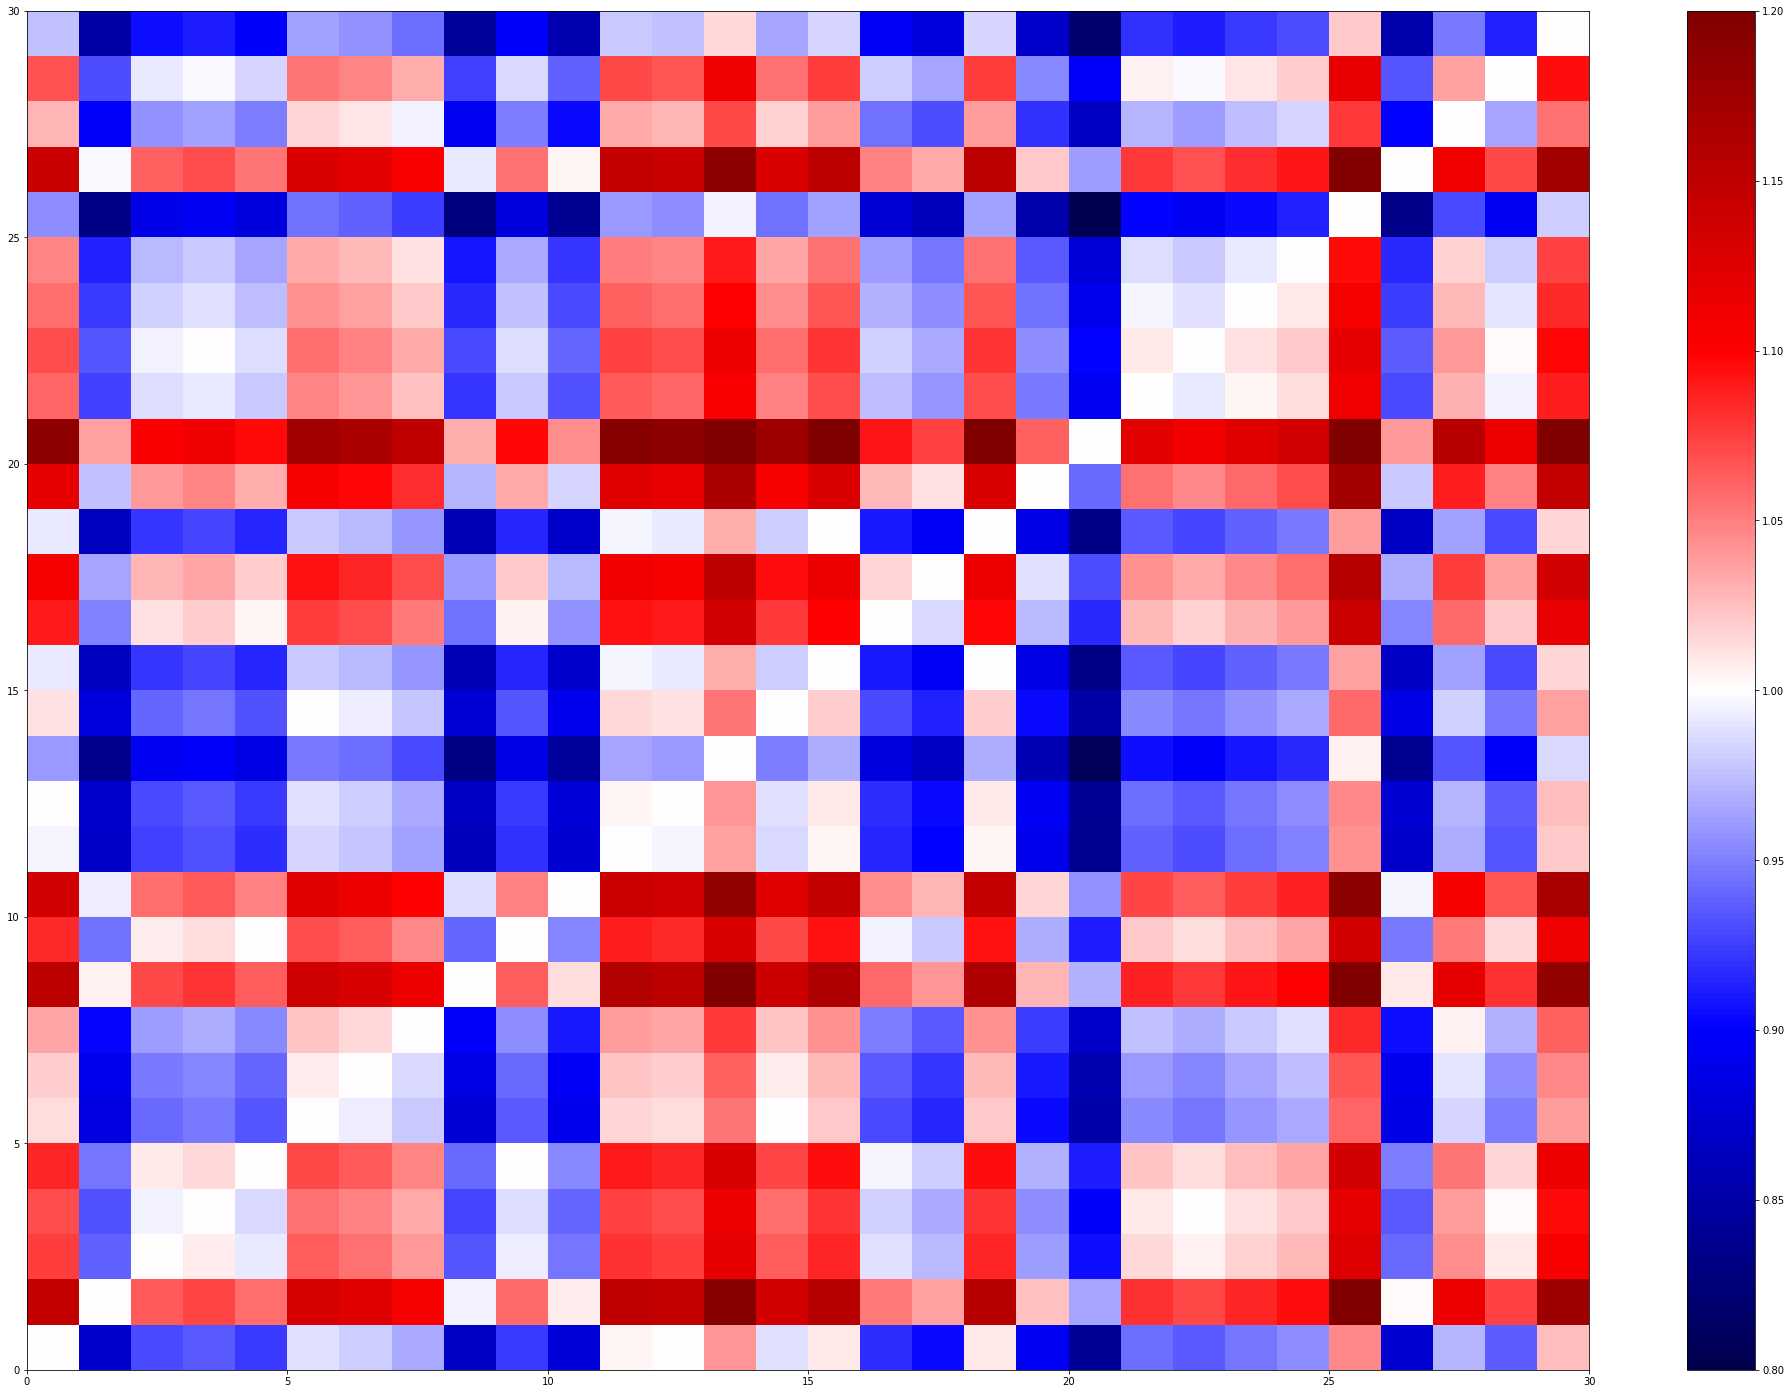

In [38]:
plot_2_examples(['seismic'],full_PCA_comp)

/tmp/ipykernel_221599/3666704146.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(np.mat(full_WT_comp), 'average')


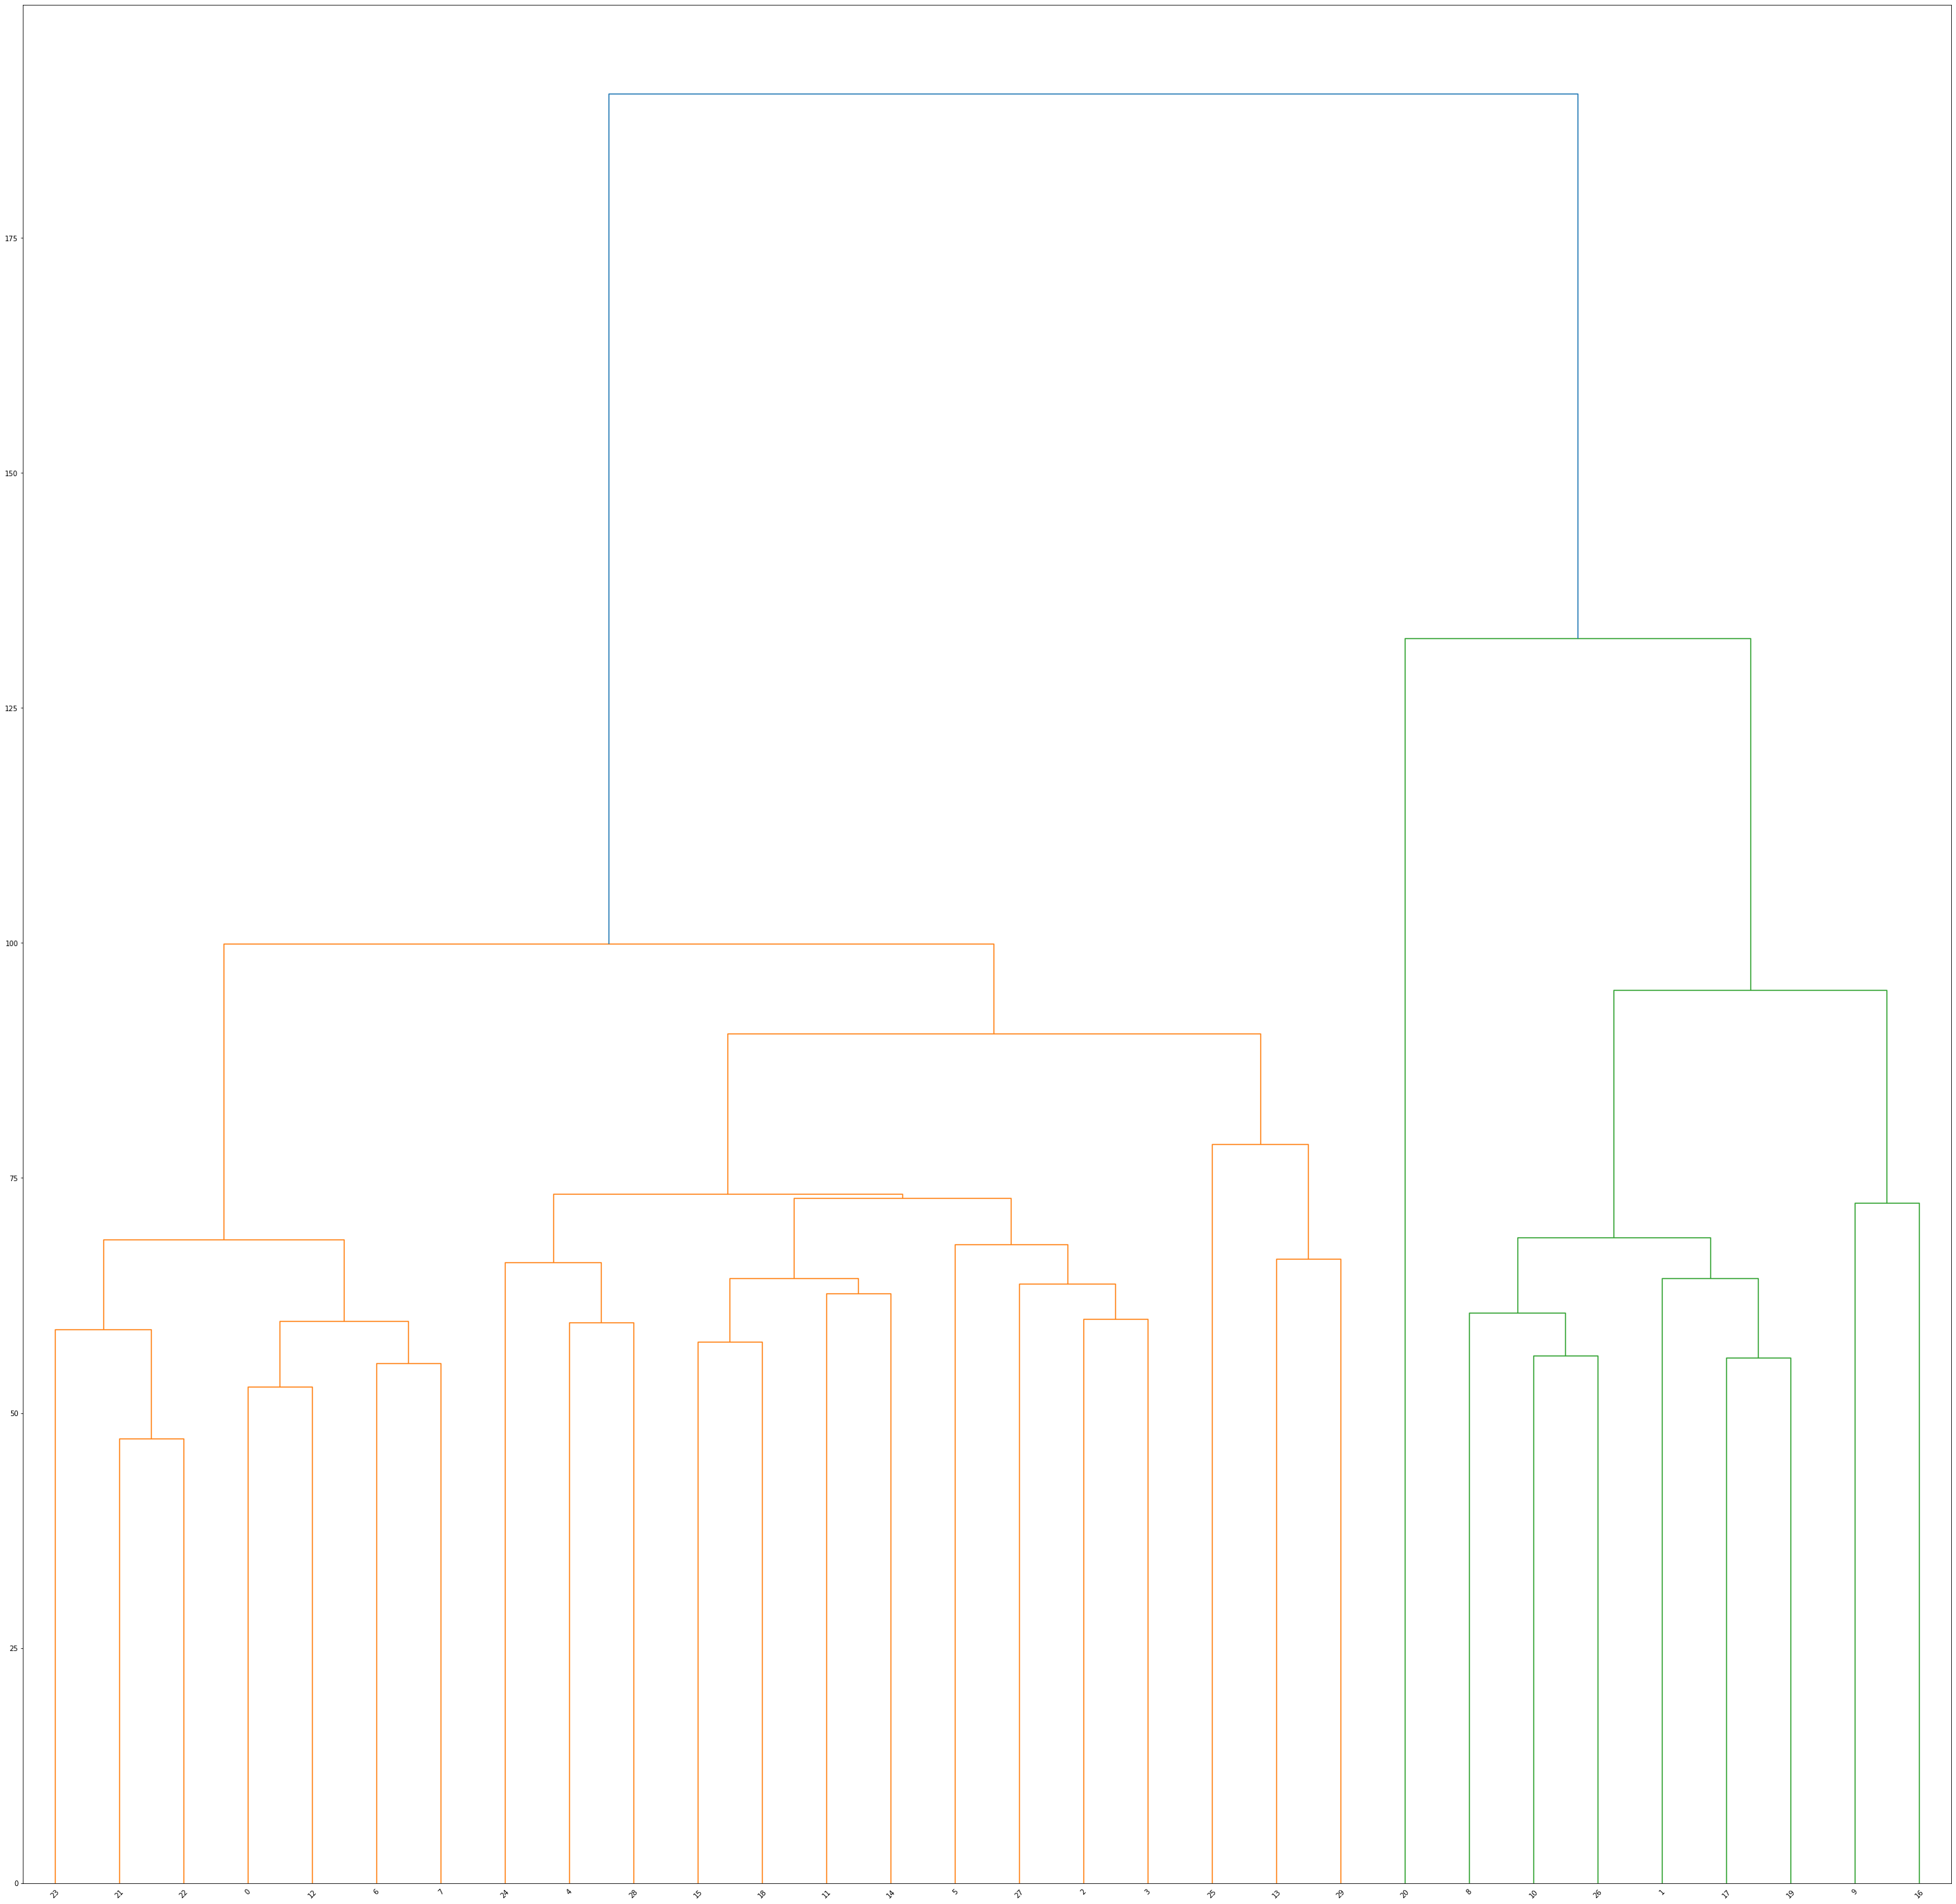

In [39]:
clust_count = 2
Z = linkage(np.mat(full_WT_comp), 'average')
fig = plt.figure(figsize=(50, 50))
dn = dendrogram(Z)
#fcluster(Z, t=6, criterion='maxclust') 
que = fcluster(Z, t=clust_count, criterion='maxclust') 

In [40]:
oop = np.where(que == 1)[0].tolist()
for n in range(2,clust_count+1):
    oop = oop + np.where(que == n)[0].tolist()
oop = oop[::-1]

The following 3 Figures make up Figure 3

(Supplemental Figure 3A) Figure below

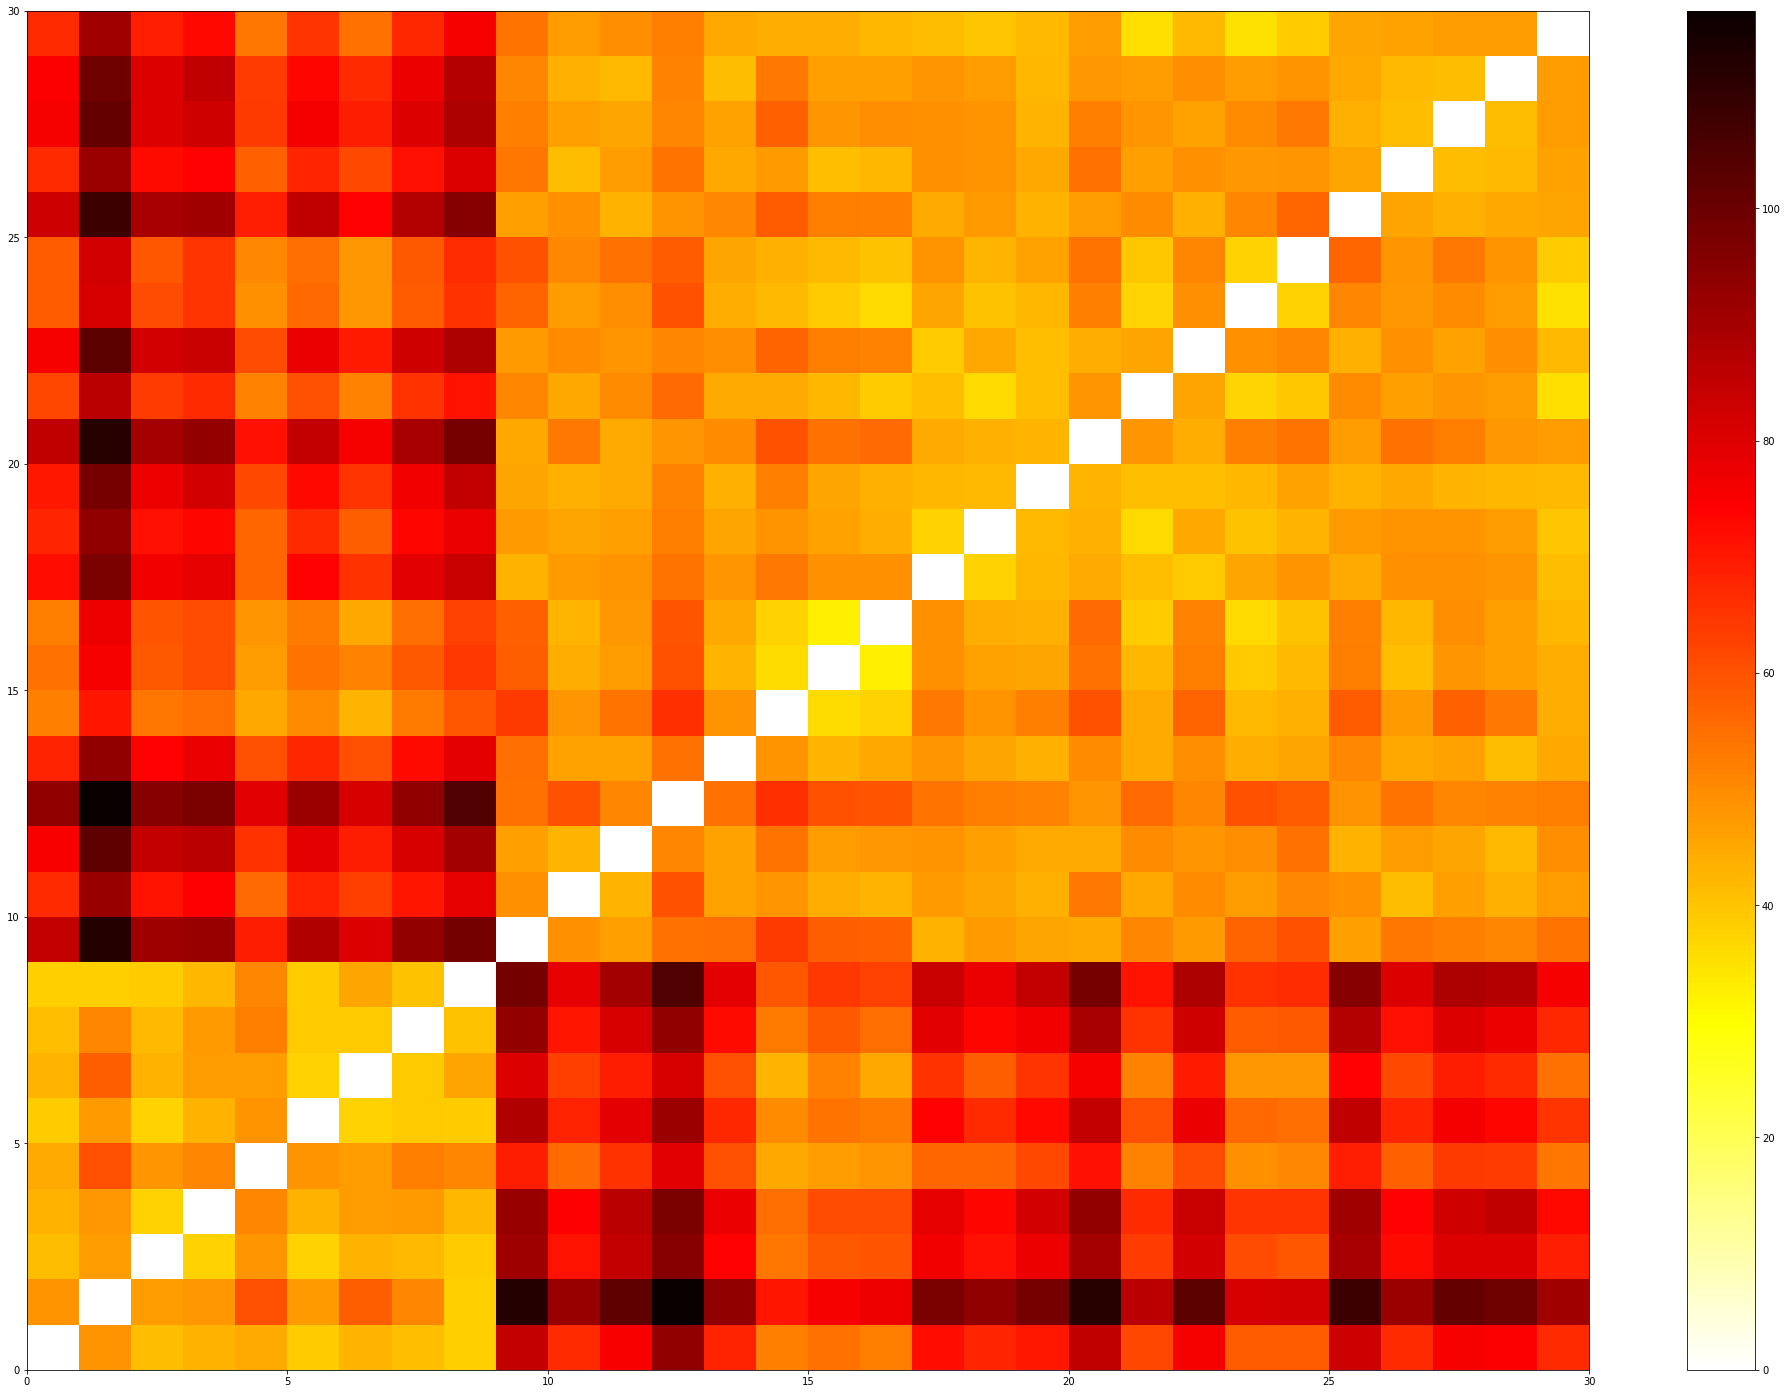

In [41]:
plot_2_examples(['hot_r'],(np.mat(full_WT_comp)[oop]).T[oop])
#plt.savefig("filepath.svg", format = 'svg', dpi=300)

(Supplemental Figure 3B) Figure below

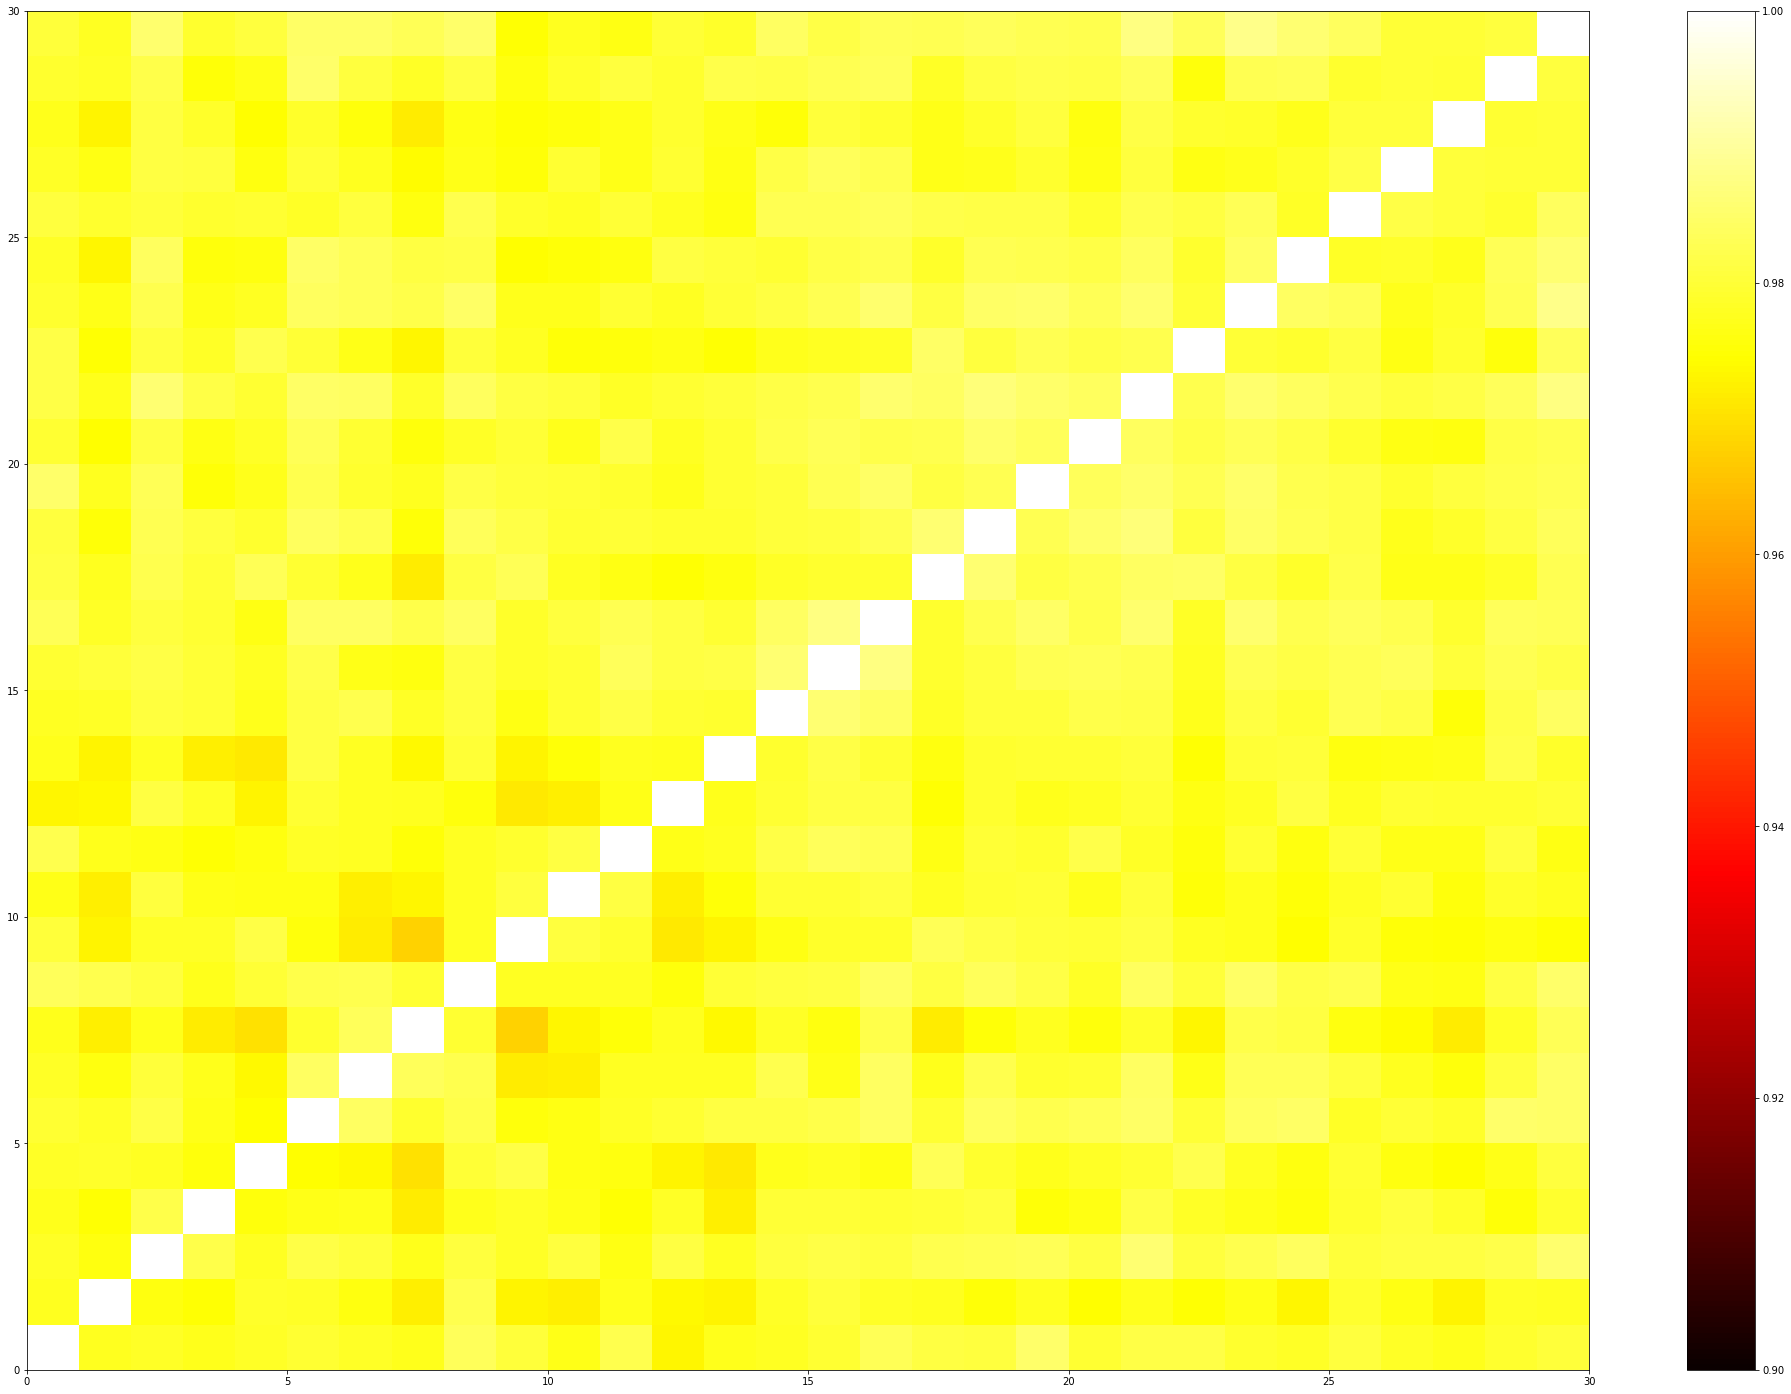

In [42]:
plot_2_examples(['hot'],full_r_comp[oop].T[oop])

(Supplemental Figure 3C) Figure below

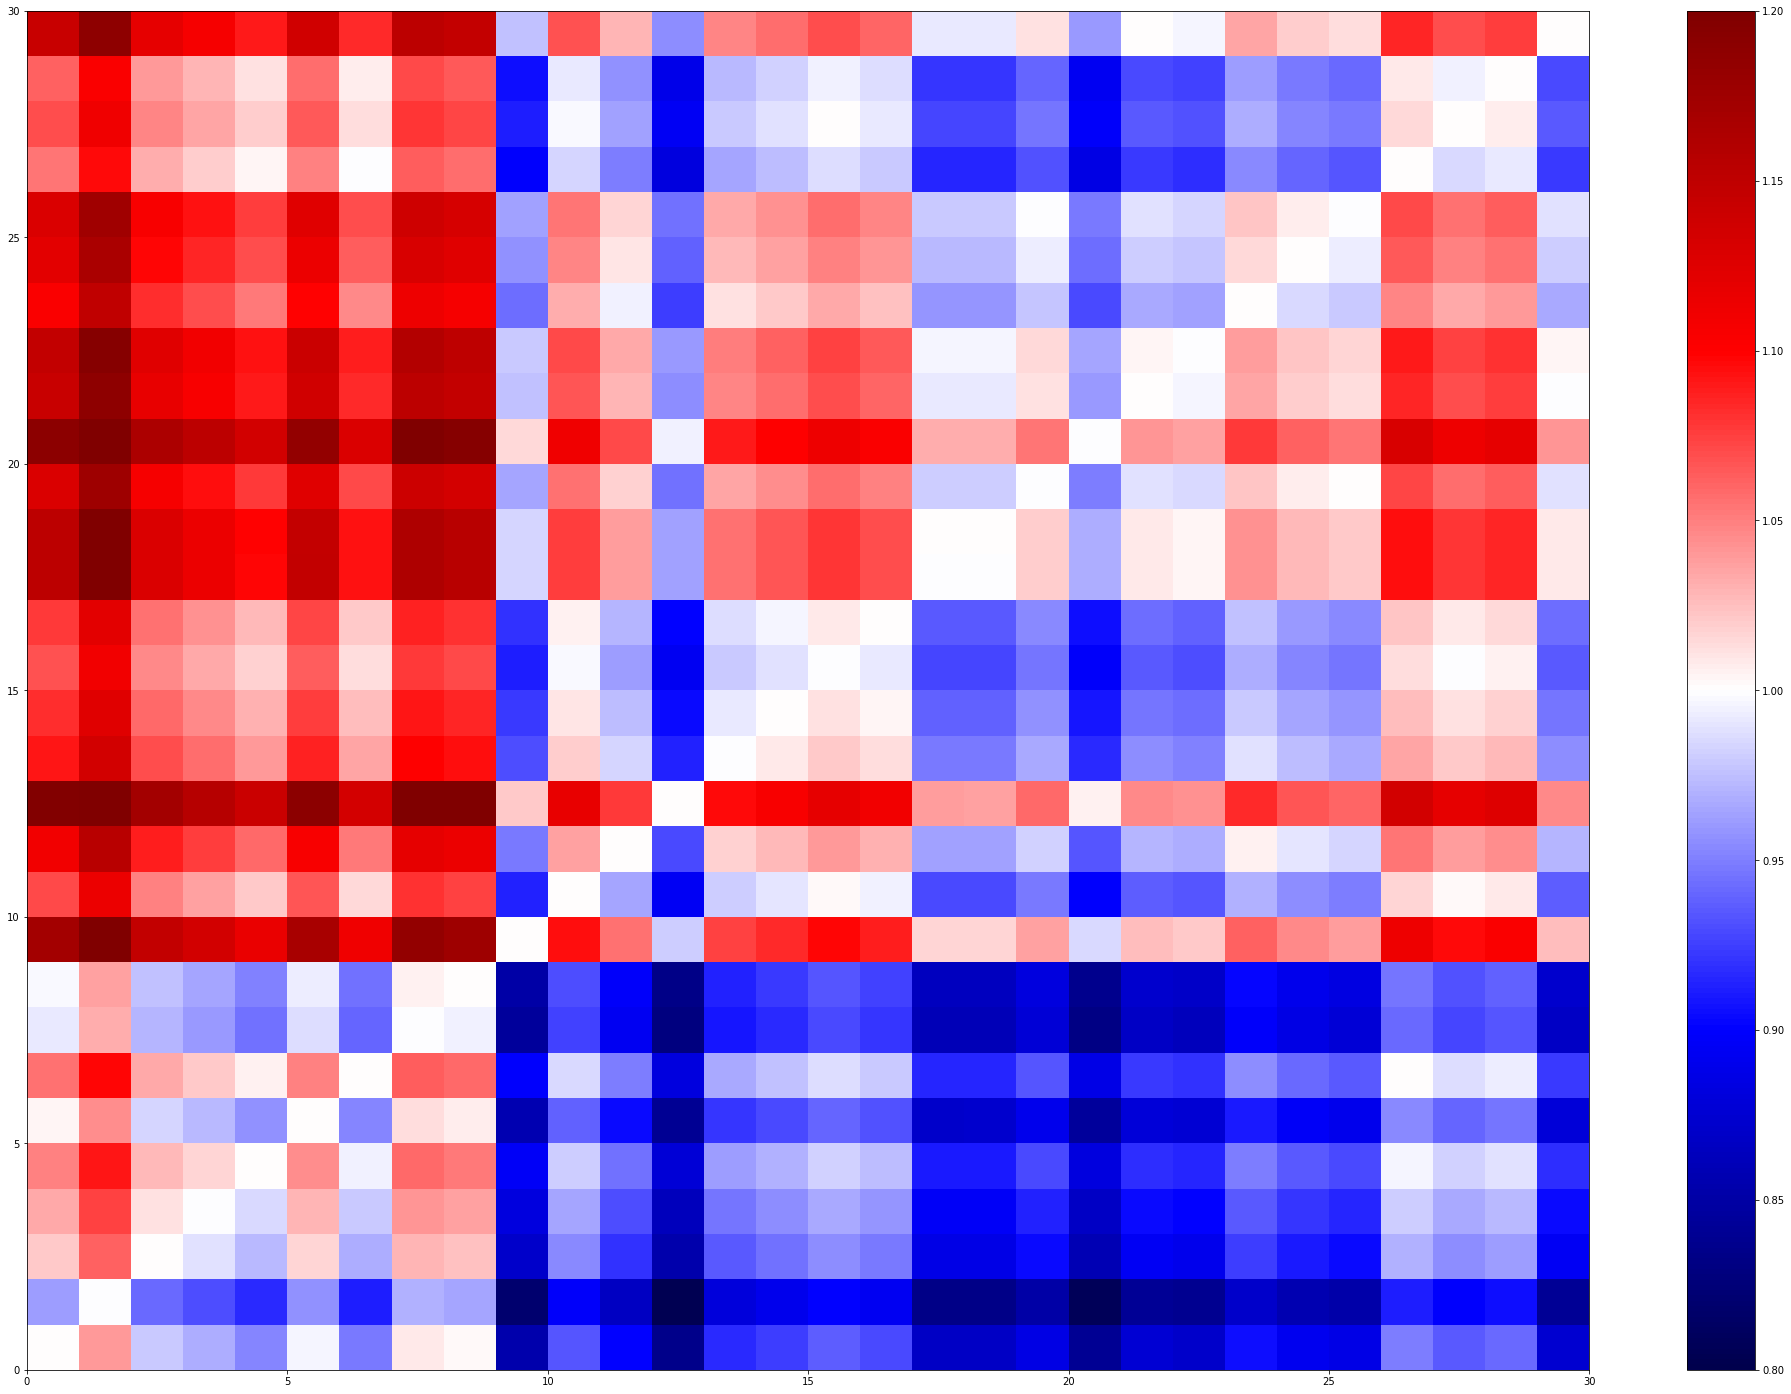

In [43]:
plot_2_examples(['seismic'],np.array(full_PCA_comp)[oop].T[oop])

In [44]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=.8, vmax=1.200) #200 TED, 275 BD instance
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (20,20))
    plt.gcf().set_size_inches(25, 10)
    #plt.gca().set_aspect('equal')
    #plt.rcParams['figure.figsize'] = [10, 10]
    plt.savefig("filepath.svg", format = 'svg', dpi=300)
    plt.show()

In [45]:
"""
trip = np.mat(full_WT_comp).flatten().tolist()[0]
plt.rcParams['figure.figsize'] = [15, 5]
from scipy.stats import norm
x_d = np.linspace(0, 100, 2000)
density = sum(norm(xi,1.69).pdf(x_d) for xi in trip) * 5
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 500]);

plt.savefig("filepath.svg", format = 'svg', dpi=300)"""

'\ntrip = np.mat(full_WT_comp).flatten().tolist()[0]\nplt.rcParams[\'figure.figsize\'] = [15, 5]\nfrom scipy.stats import norm\nx_d = np.linspace(0, 100, 2000)\ndensity = sum(norm(xi,1.69).pdf(x_d) for xi in trip) * 5\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), \'|k\', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 500]);\n\nplt.savefig("filepath.svg", format = \'svg\', dpi=300)'

(Supplemental Figure 4) Code below

In [46]:
full_WT_comp = []; full_r_comp = []; full_PCA_comp = [];
for n in range(0,len(fulldictset)):
    temp_WT_comp = [] #; temp_r_comp = []
    for m in range(0,len(fulldictset)):
        temp_WT_comp.append(union_branch_distance(fulldictset[n],fulldictset[m]))
        #x,y = dict_to_vector(fulldictset[n],fulldictset[m])
        #m, b, r, p_value, std_err = stats.linregress(x,y)
        #temp_r_comp.append(r)
    full_WT_comp.append(temp_WT_comp)
    #full_r_comp.append(temp_r_comp)
    print(n)
full_WT_comp = np.mat(full_WT_comp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [47]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(35, 25)
    plt.show()

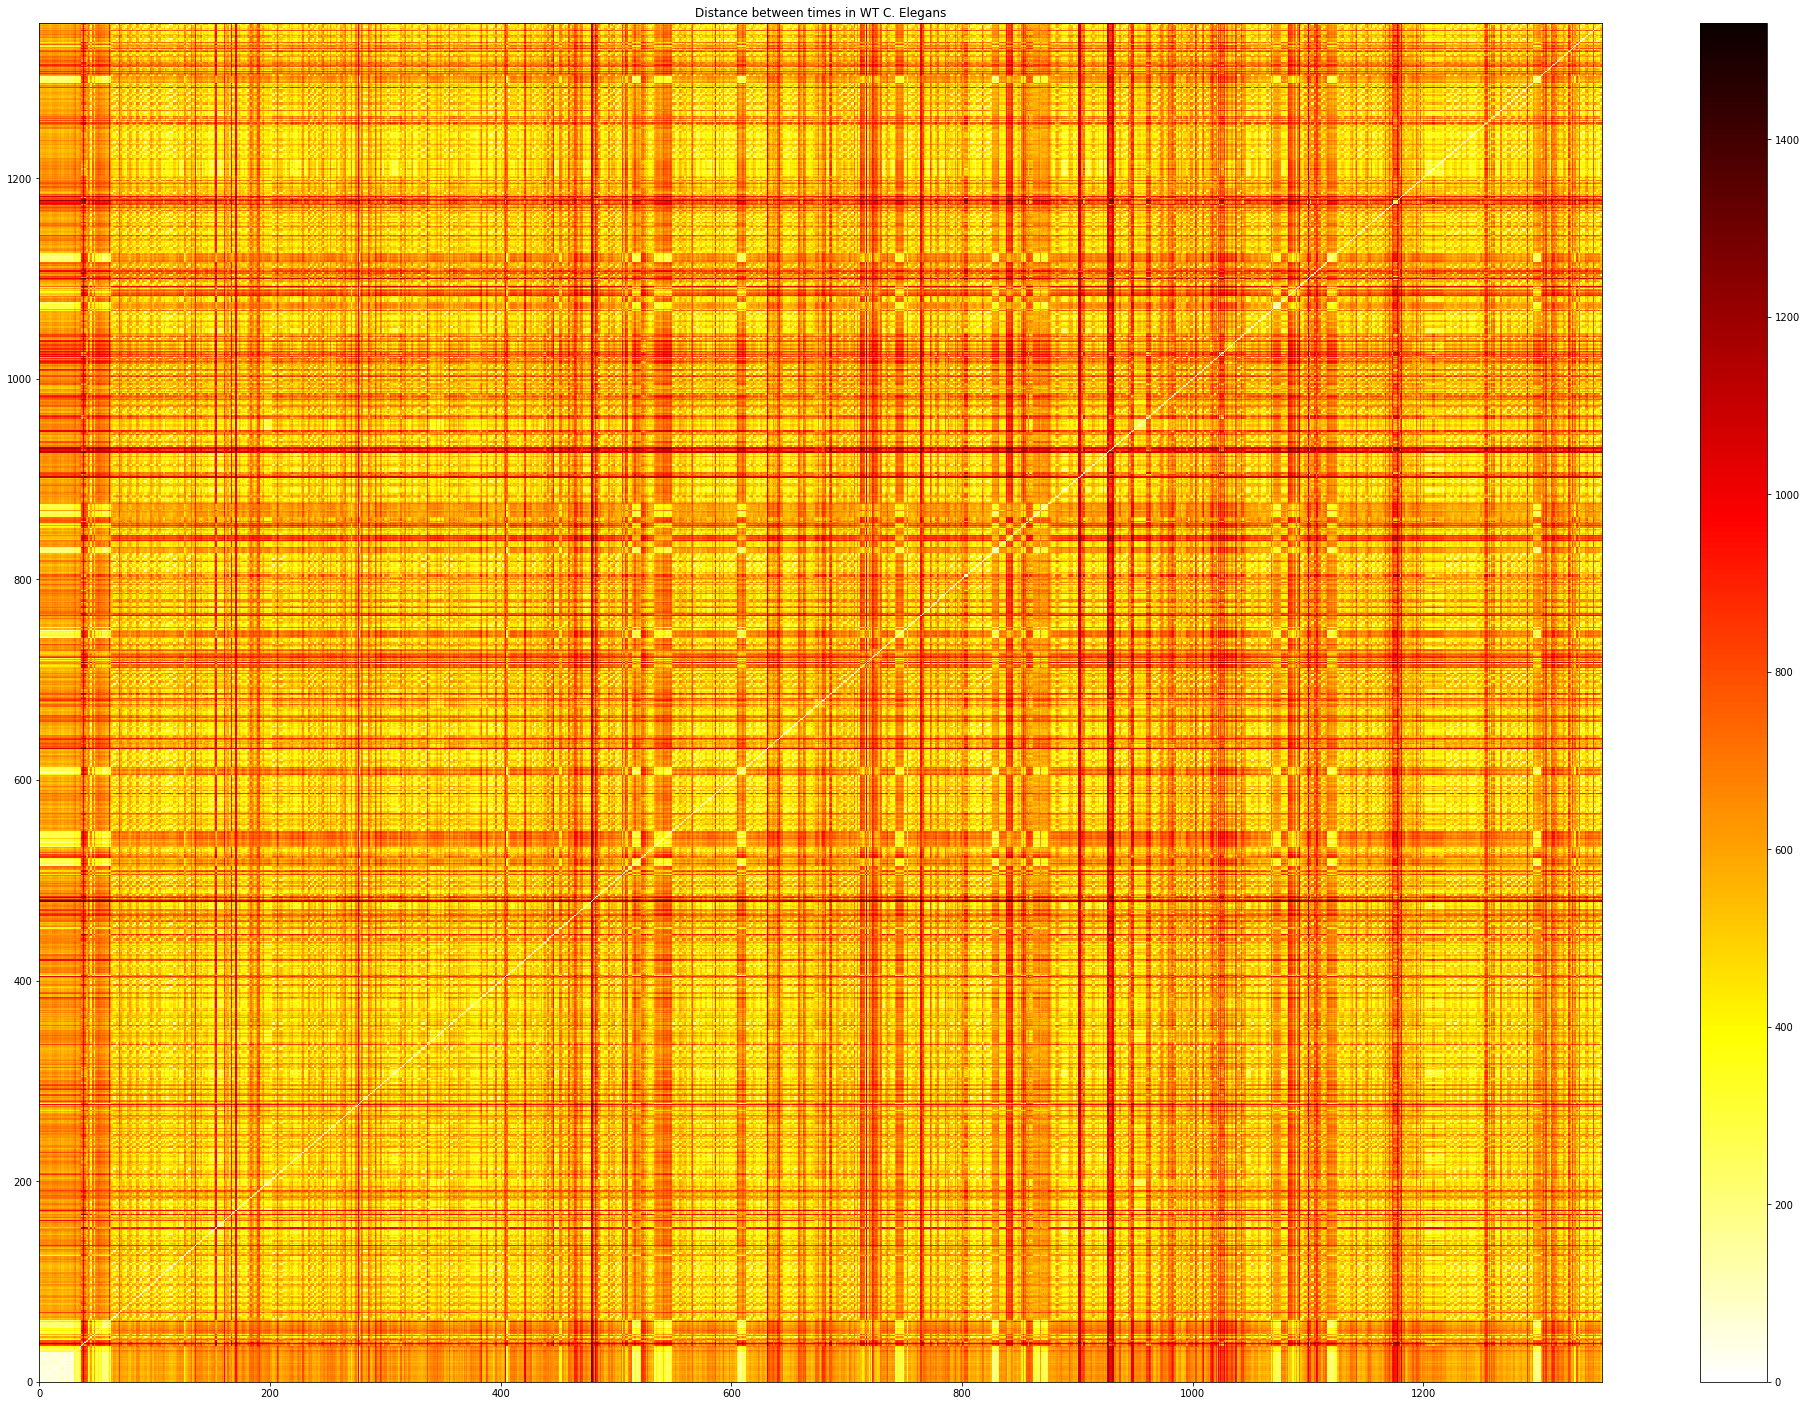

In [48]:
plot_2_examples(['hot_r'],full_WT_comp)

/tmp/ipykernel_221599/3712124930.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(np.mat(full_WT_comp), 'average')


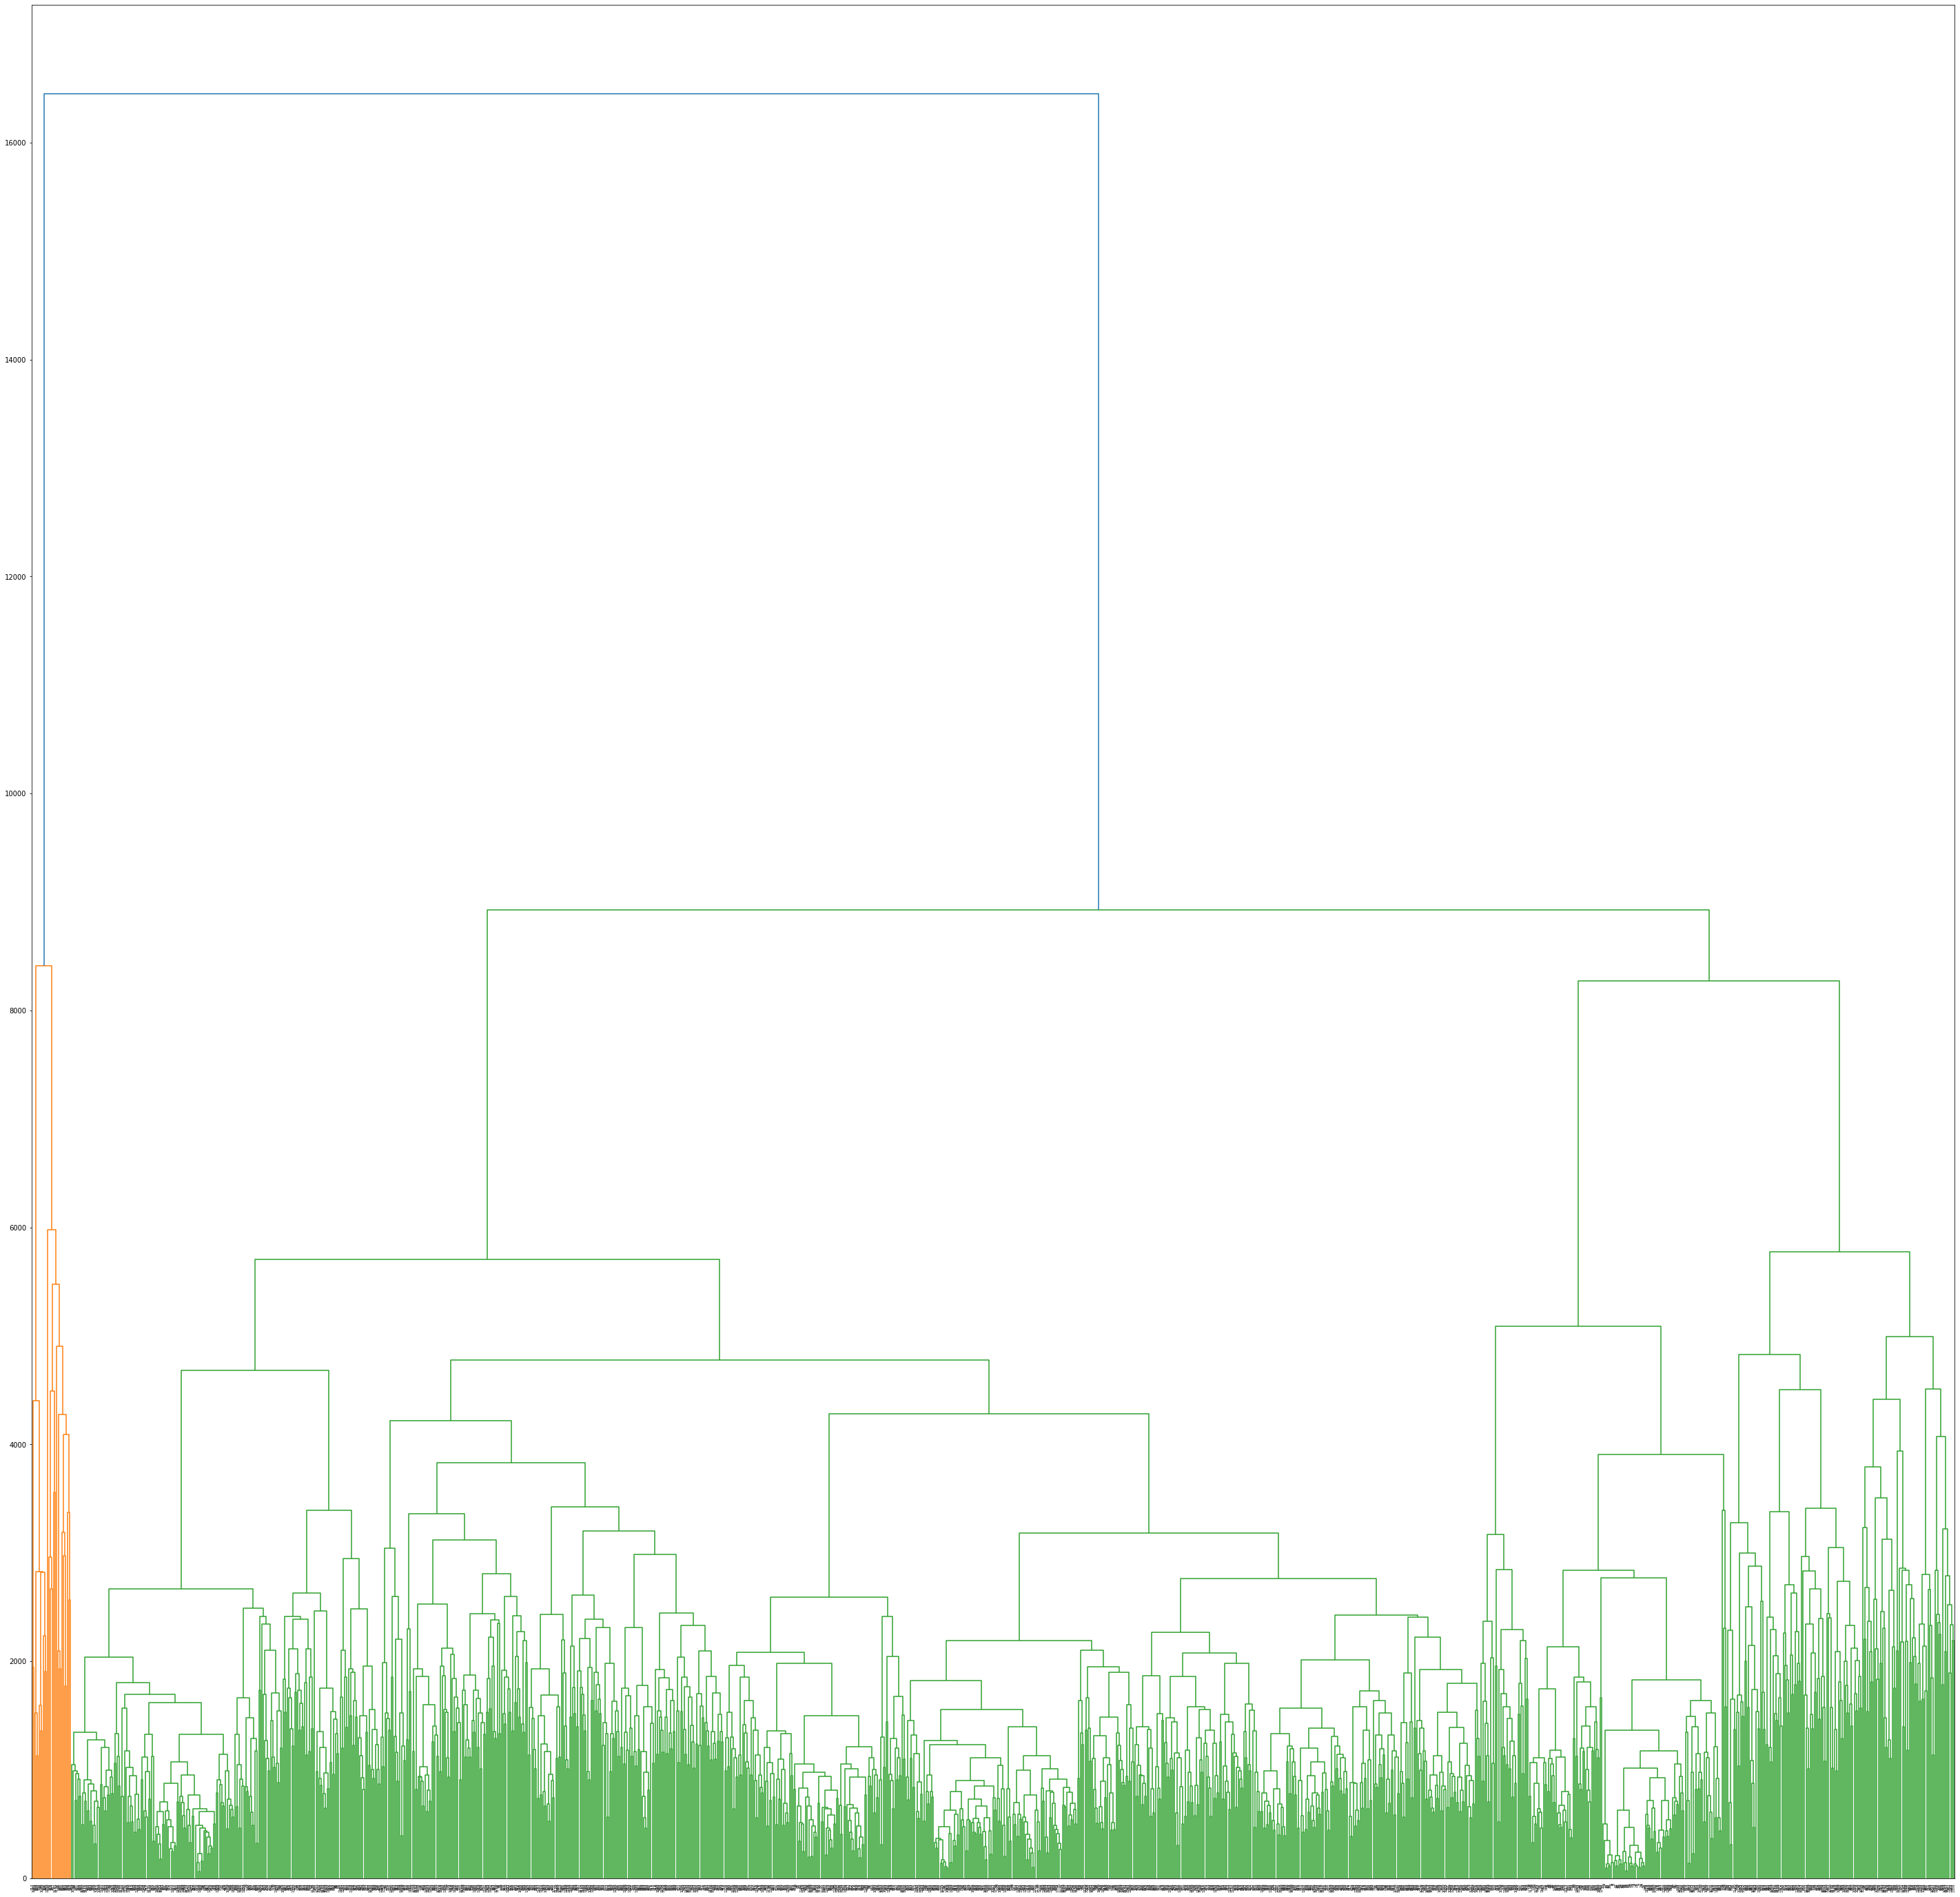

In [49]:
clust_count = 5
Z = linkage(np.mat(full_WT_comp), 'average')
fig = plt.figure(figsize=(50, 50))
dn = dendrogram(Z)
#fcluster(Z, t=6, criterion='maxclust') 
que = fcluster(Z, t=clust_count, criterion='maxclust')
plt.savefig("filepath.svg", format = 'svg', dpi=300)

In [50]:
oop = np.where(que == 1)[0].tolist()
for n in range(2,clust_count+1):
    oop = np.where(que == n)[0].tolist() + oop
oop = oop[::-1]

oop = np.where(que == 1)[0].tolist() + np.where(que == 2)[0].tolist() + np.where(que == 3)[0].tolist() +np.where(que == 4)[0].tolist() + np.where(que == 5)[0].tolist()

(Supplemental Figure 4A) Figure below

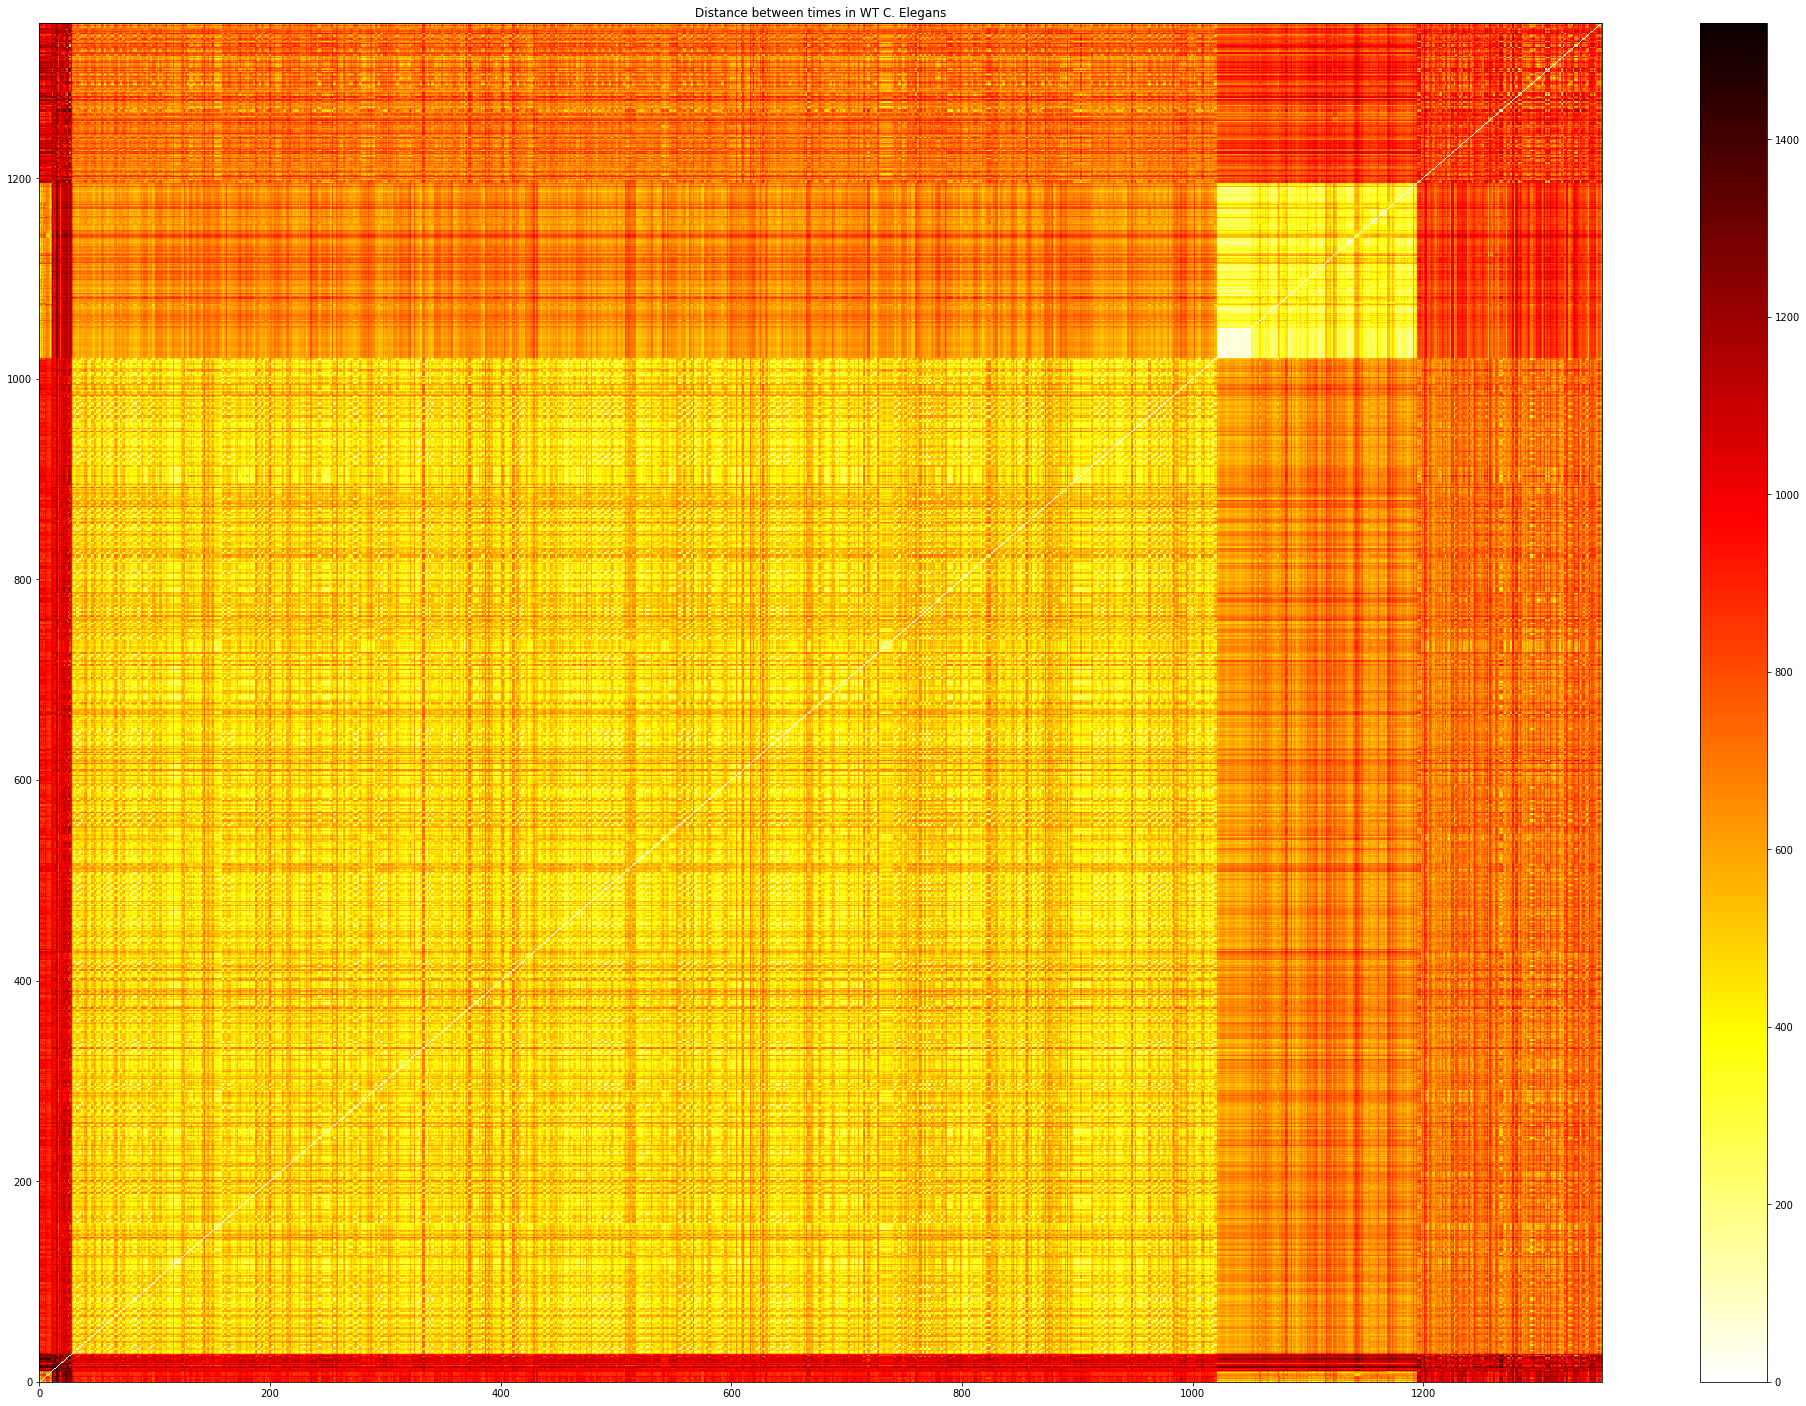

In [51]:
plot_2_examples(['hot_r'],full_WT_comp[oop].T[oop])

In [52]:
full_BD_comp = []; full_TED_comp = []; full_PCA_comp = [];
for n in range(0,len(fulldictset)):
    temp_WT_comp = [] #; temp_r_comp = []
    temp_TED_comp = []
    for m in range(0,30):
        temp_WT_comp.append(intersection_branch_distance(fulldictset[n],fulldictset[m]))
        temp_TED_comp.append( tree_edit_distance(fulldictset[n],fulldictset[m]))
        #x,y = dict_to_vector(fulldictset[n],fulldictset[m])
        #m, b, r, p_value, std_err = stats.linregress(x,y)
        #temp_r_comp.append(r)
    full_BD_comp.append(temp_WT_comp)
    full_TED_comp.append(temp_TED_comp)
    #full_r_comp.append(temp_r_comp)
    print(n)
full_BD_comp = np.mat(full_BD_comp)
full_TED_comp = np.mat(full_TED_comp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [53]:
for n in range(0,len(fullnameset)):
    if 'SKR-2' in fullnameset[n]:
        print(n)

1083
1084
1085
1086
1087
1088
1089
1090
1091
1092


In [54]:
for n in range(0,len(fullnameset)):
    if 'SUF-1' in fullnameset[n]:
        print(n)

1125
1126
1127
1128
1129
1130


In [55]:
RNAi_size_assignments['SKR-2'], RNAi_size_assignments['SUF-1']

([1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089],
 [1122, 1123, 1124, 1125, 1126, 1127])

In [56]:
np.where(RNAi_name_array == 'SKR-2'), np.where(RNAi_name_array == 'SUF-1')

((array([1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089]),),
 (array([1122, 1123, 1124, 1125, 1126, 1127]),))

In [57]:
for n in range(1083,1093):
    print(n, tree_edit_distance(fulldictset[0],fulldictset[n]))

1083 25
1084 55
1085 67
1086 27
1087 35
1088 67
1089 50
1090 157
1091 47
1092 83


In [58]:
for n in [1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089]:
    print(n, tree_edit_distance(fulldictset[0],fulldictset[n]))

1080 204
1081 136
1082 196
1083 25
1084 55
1085 67
1086 27
1087 35
1088 67
1089 50


In [59]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=200) #200 TED, 275 BD instance
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (20,20))
    plt.gcf().set_size_inches(25, 10)
    #plt.gca().set_aspect('equal')
    #plt.rcParams['figure.figsize'] = [10, 10]
    plt.savefig("filepath.svg", format = 'svg', dpi=300)
    plt.show()

(Supplemental Figure 4Bi) Figure below

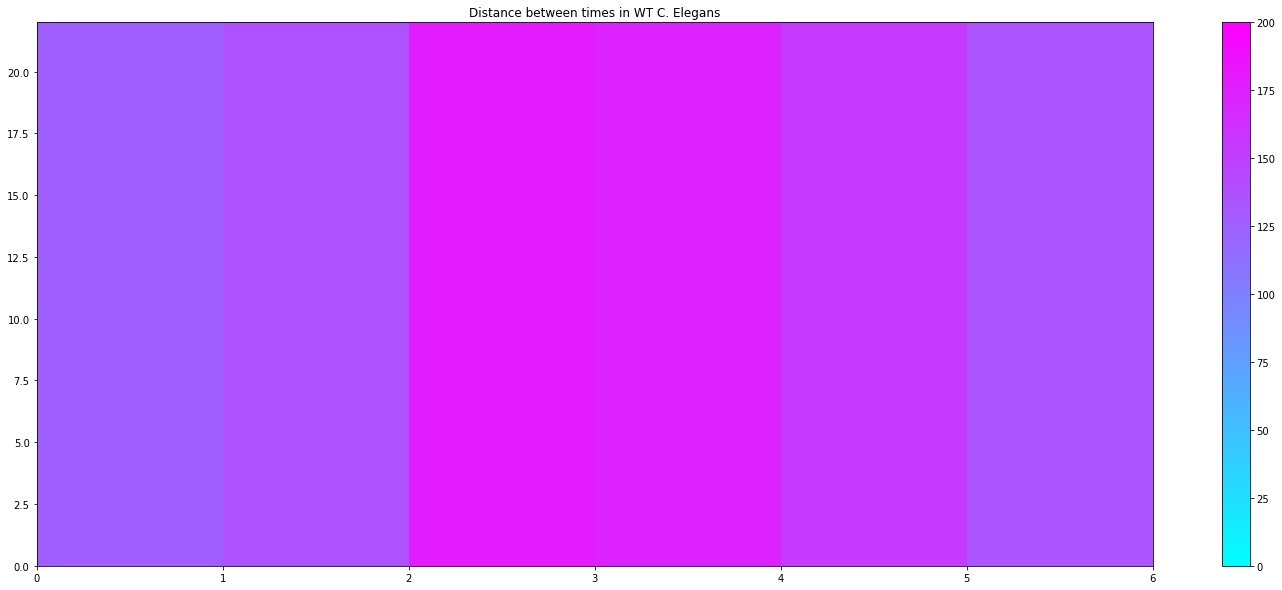

In [60]:
plot_2_examples(['cool'],full_TED_comp[range(1125,1131)].T[inlier_ref])

(Supplemental Figure 4Biii) Figure below

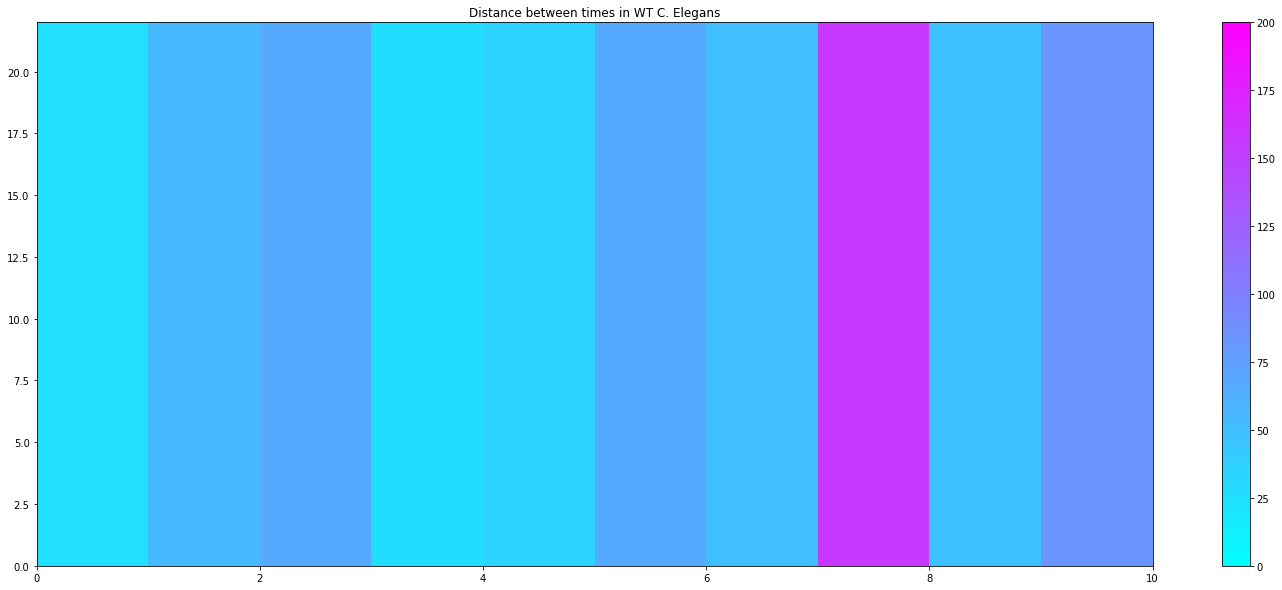

In [61]:
plot_2_examples(['cool'],full_TED_comp[range(1083,1093)].T[inlier_ref])

In [62]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=300) #200 TED, 275 BD instance
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (20,20))
    plt.gcf().set_size_inches(25, 10)
    #plt.gca().set_aspect('equal')
    #plt.rcParams['figure.figsize'] = [10, 10]
    plt.savefig("filepath.svg", format = 'svg', dpi=300)
    plt.show()

(Supplemental Figure 4Bii) Figure below

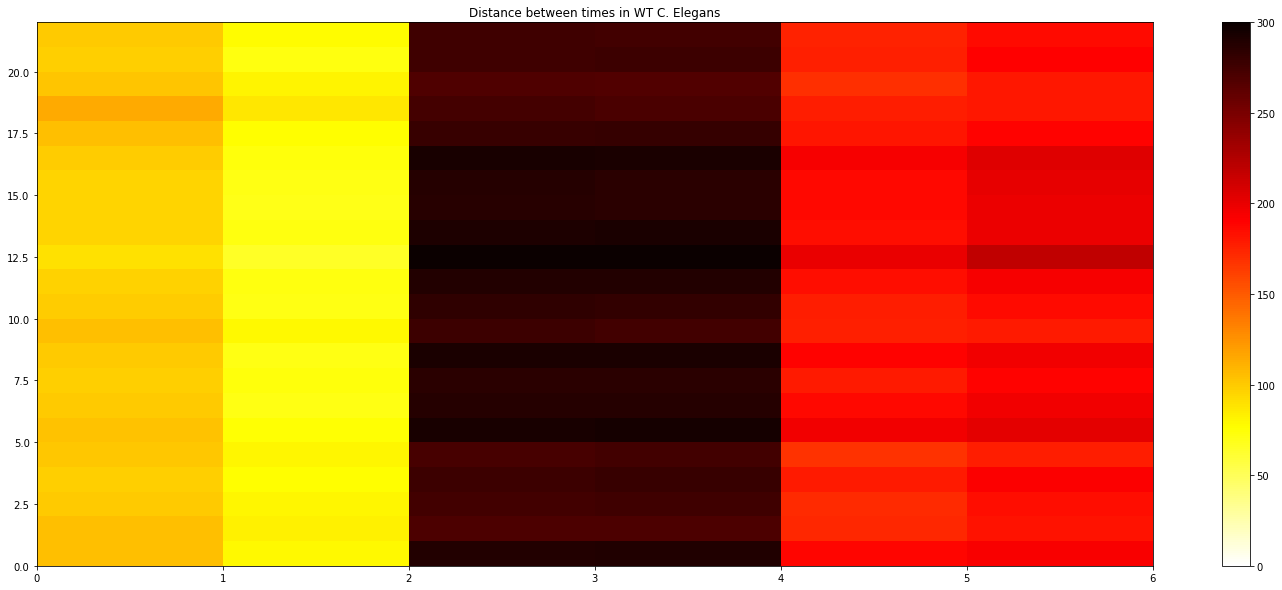

In [63]:
plot_2_examples(['hot_r'],full_BD_comp[range(1125,1131)].T[inlier_ref])

(Supplemental Figure 4Biv) Figure below

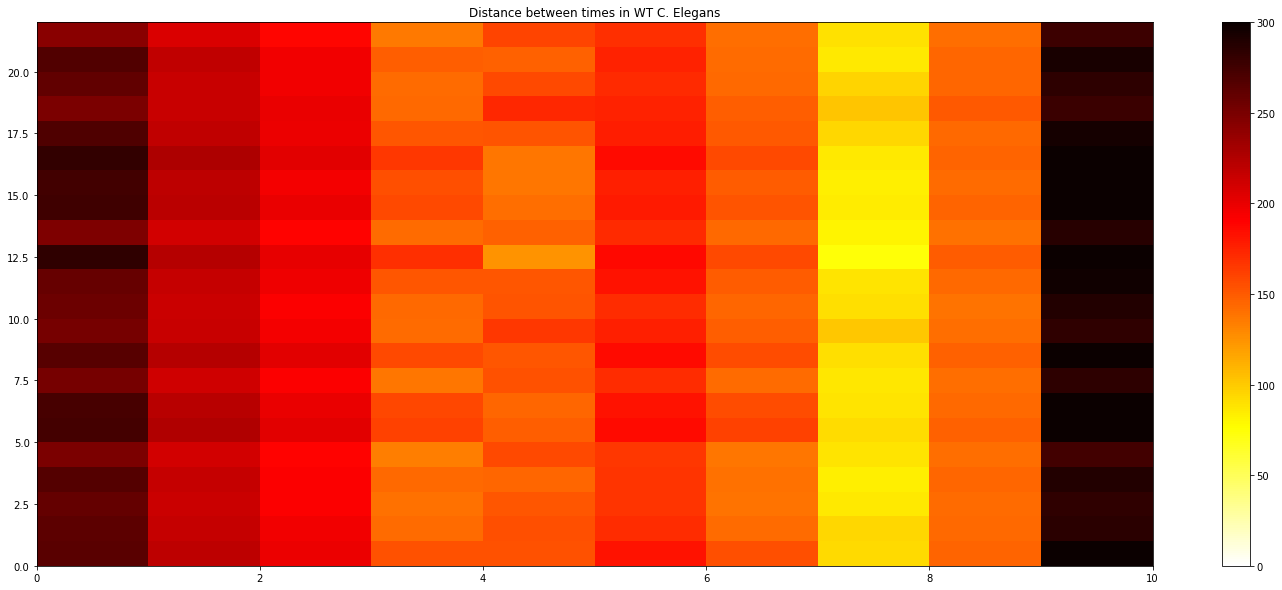

In [64]:
plot_2_examples(['hot_r'],full_BD_comp[range(1083,1093)].T[inlier_ref])

In [65]:
full_BD_comp.T[0].T.shape

(1355, 1)

In [66]:
full_TED_comp.T[0].T.shape

(1355, 1)

In [67]:
qw,qe = np.array(full_TED_comp.T[0])[0][30:],np.array(full_BD_comp.T[0])[0][30:]

In [68]:
uyuy = np.argsort(qw)

(Supplemental Figure 4C) Figure below

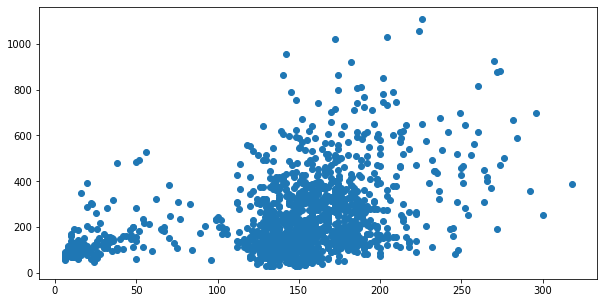

In [69]:
plt.scatter(qw[uyuy[:-3]],qe[uyuy[:-3]])

RNAi_size_assignments['OMA-1/2'] = RNAi_size_assignments['OMA-1']

In [ ]:
(Supplemental Figure 5) Code below

In [234]:
self_b_mat_RNAi = [];
inlier_ref = [0, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 18, 21, 22, 23, 24, 25, 27, 28, 29];

self_b_mat_RNAi_eff = np.zeros((len(inlier_ref)*len(root_cells_comp),len(inlier_ref)*len(root_cells_comp)))
for n in range(0,len(root_cells_comp)):
    for m in range(0,len(inlier_ref)):
        x_index = n*len(inlier_ref)+m
        nim = node_comparison_trimmer(fulldictset[inlier_ref[m]],root_cells_comp[n])
        for a in range(0,len(root_cells_comp)):
            for b in range(0,len(inlier_ref)):
                y_index = a*len(inlier_ref)+b
                if y_index > x_index:
                    continue
                ab = node_comparison_trimmer(fulldictset[inlier_ref[b]],root_cells_comp[a])
                self_b_mat_RNAi_eff[x_index,y_index] = intersection_branch_distance(nim,ab)
        #self_b_mat_RNAi.append(branches)
    print(root_cells_comp[n])
self_b_mat_RNAi_eff = self_b_mat_RNAi_eff + self_b_mat_RNAi_eff.T

UBD_WT_internal = self_b_mat_RNAi_eff

ABa
ABp
ABal
ABar
ABpl
ABpr
ABala
ABalp
ABara
ABarp
ABpla
ABplp
ABpra
ABprp
EMS
P2
MS
E
C
P3
D


In [ ]:
(Supplemental Figure 5A) Figure below

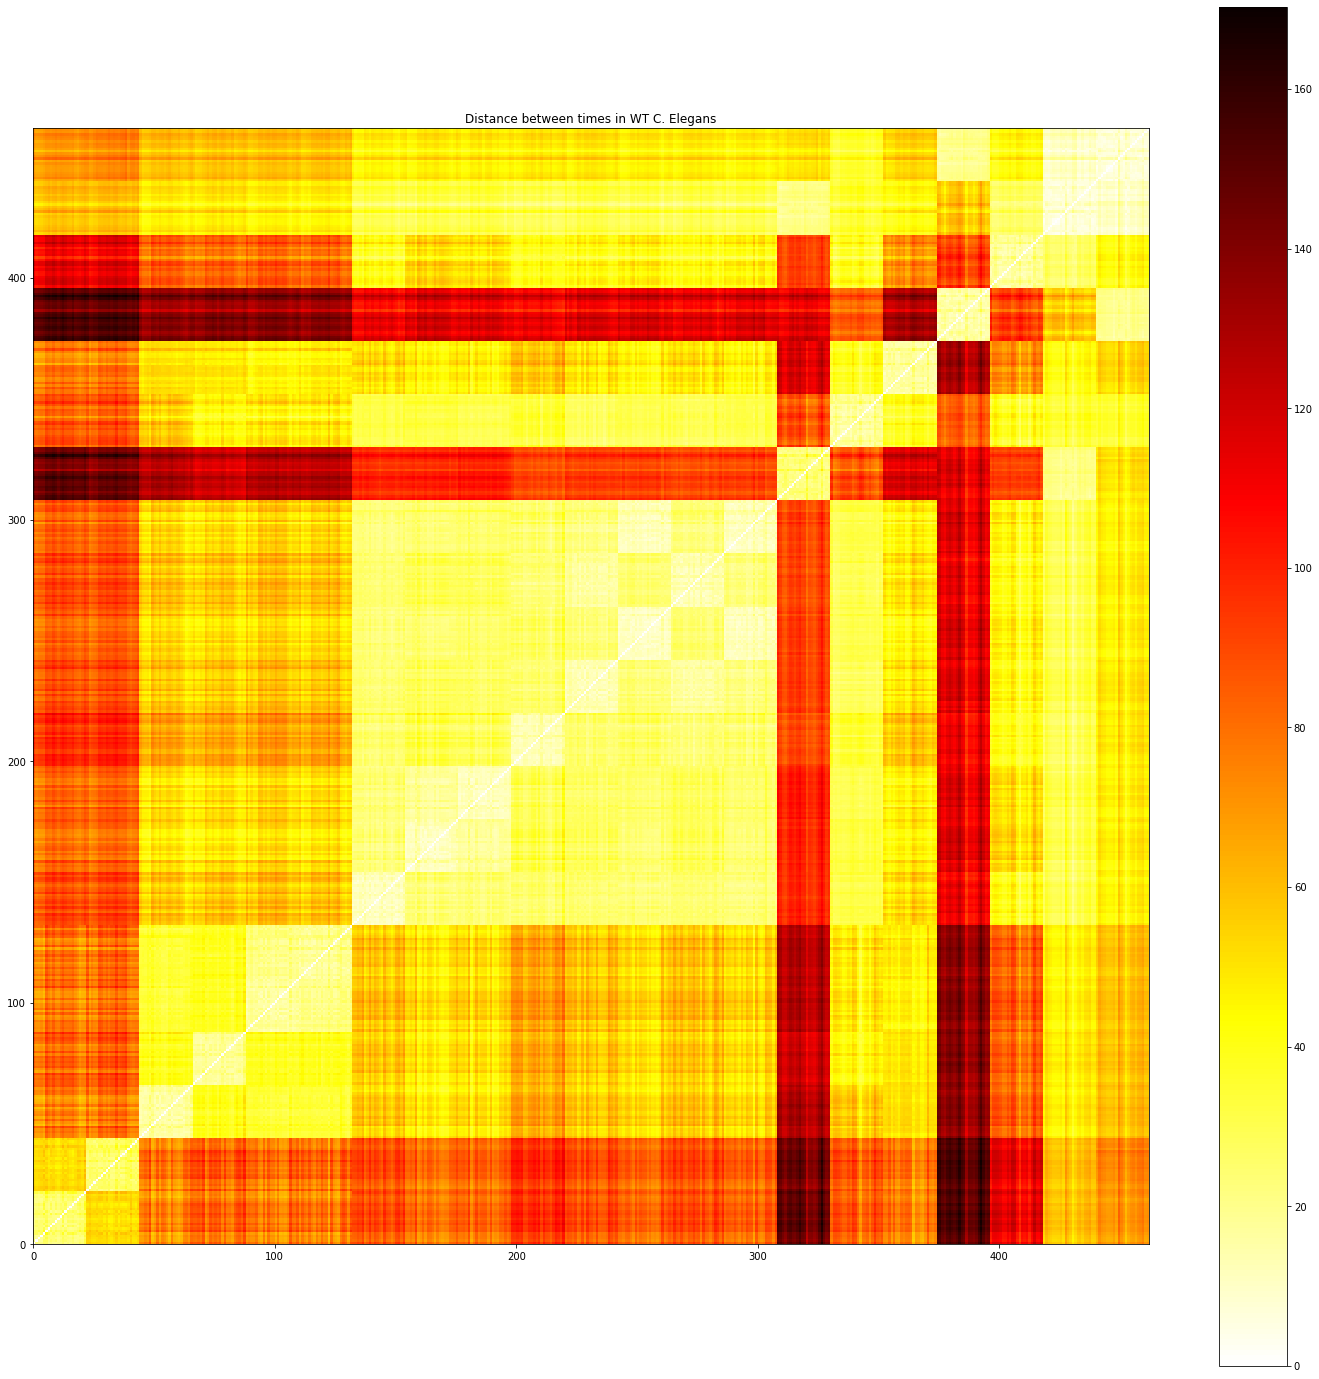

0.0 170.32597423763647


In [235]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0)) #200 TED, 275 BD instance
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (20,20))
    plt.gcf().set_size_inches(25, 25)
    plt.gca().set_aspect('equal')
    #plt.rcParams['figure.figsize'] = [30, 30]
    plt.savefig("filepath.svg", format = 'svg', dpi=300)
    plt.show()
    
b_mat = self_b_mat_RNAi_eff
plot_2_examples(['hot_r'],self_b_mat_RNAi_eff)
print(min(self_b_mat_RNAi_eff.flatten()),max(self_b_mat_RNAi_eff.flatten()))

In [236]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=70) #200 TED, 275 BD instance
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (20,20))
    plt.gcf().set_size_inches(25, 25)
    plt.gca().set_aspect('equal')
    #plt.rcParams['figure.figsize'] = [30, 30]
    plt.savefig("filepath.svg", format = 'svg', dpi=300)
    plt.show()

(Supplemental Figure 5C) Figure below

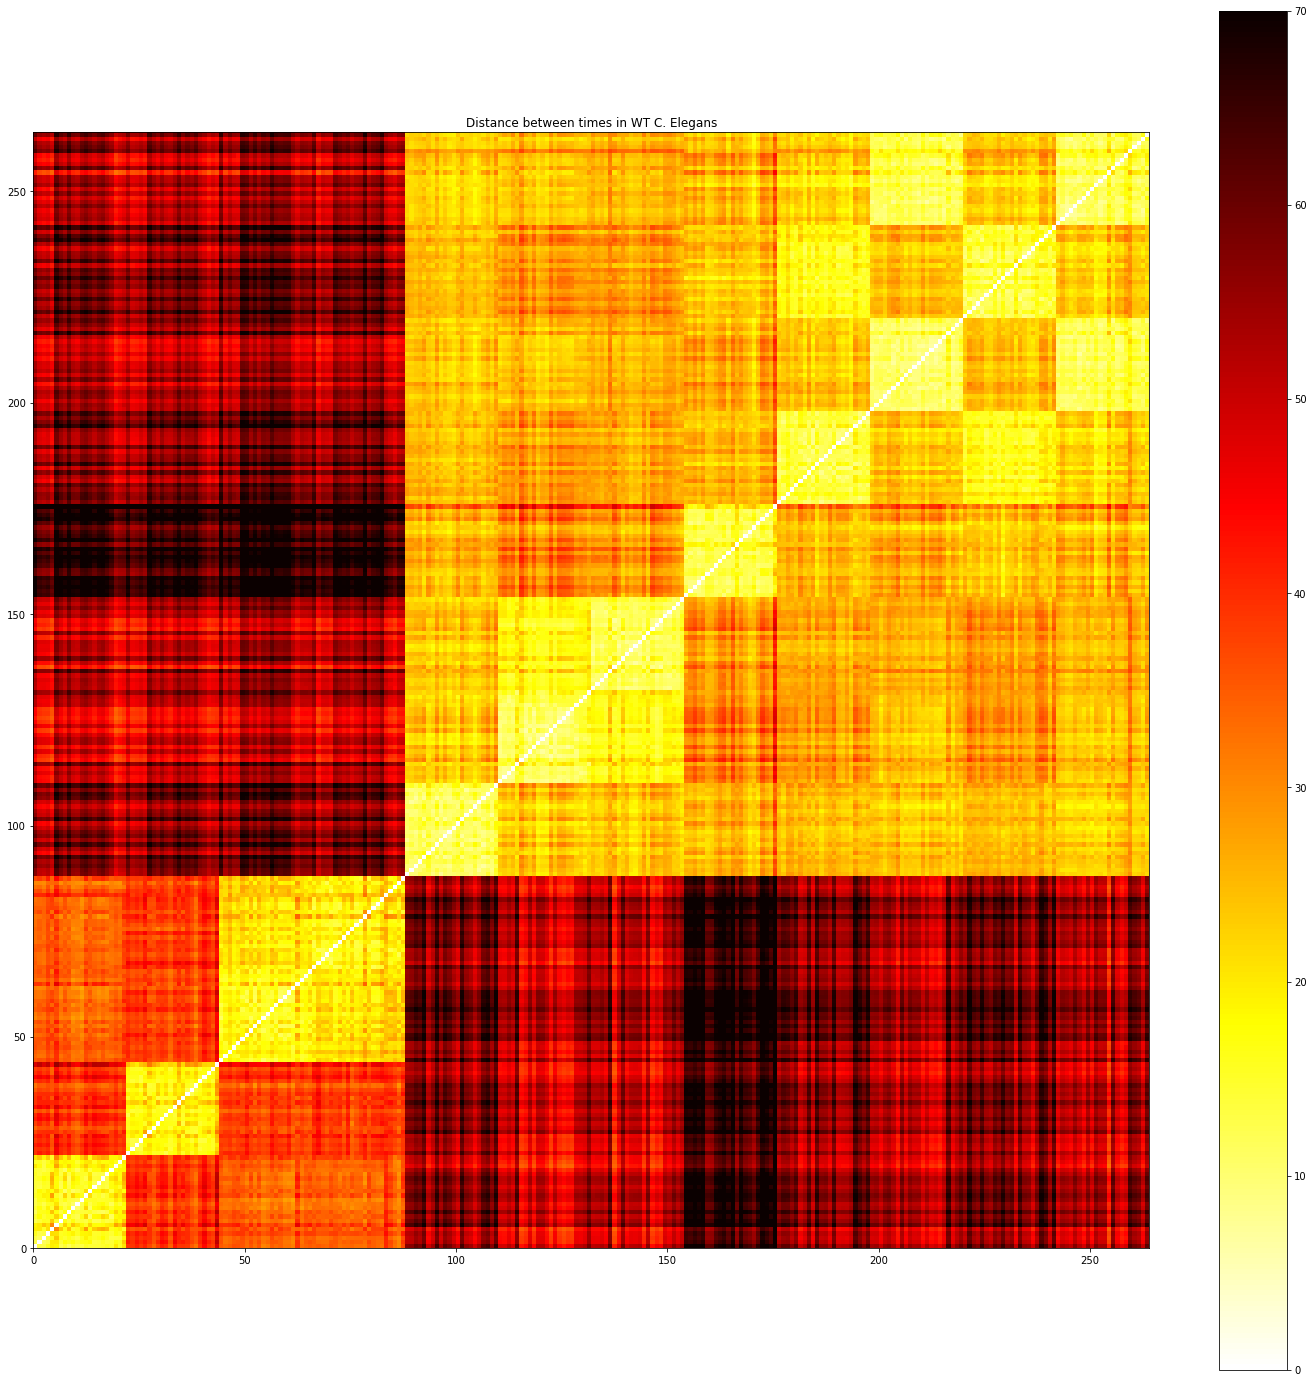

In [238]:
plot_2_examples(['hot_r'],self_b_mat_RNAi_eff[2*len(inlier_ref):14*len(inlier_ref)].T[2*len(inlier_ref):14*len(inlier_ref)])

Significance Tests for WT for Figure 5E

In [239]:
x = self_b_mat_RNAi_eff[2*len(inlier_ref):3*len(inlier_ref),3*len(inlier_ref):4*len(inlier_ref)].flatten()
y = self_b_mat_RNAi_eff[4*len(inlier_ref):5*len(inlier_ref),5*len(inlier_ref):6*len(inlier_ref)].flatten()

novel_two_sample_permutation_test(x,y, 1000)

0.0

In [240]:
x = self_b_mat_RNAi_eff[6*len(inlier_ref):7*len(inlier_ref),7*len(inlier_ref):8*len(inlier_ref)].flatten()
y = self_b_mat_RNAi_eff[7*len(inlier_ref):8*len(inlier_ref),8*len(inlier_ref):9*len(inlier_ref)].flatten()
z = self_b_mat_RNAi_eff[8*len(inlier_ref):9*len(inlier_ref),9*len(inlier_ref):10*len(inlier_ref)].flatten()


novel_two_sample_permutation_test(x.tolist() + z.tolist(), y, 1000)

0.0

In [241]:
z = self_b_mat_RNAi_eff[10*len(inlier_ref):11*len(inlier_ref),11*len(inlier_ref):12*len(inlier_ref)]
z2 = self_b_mat_RNAi_eff[10*len(inlier_ref):11*len(inlier_ref),12*len(inlier_ref):13*len(inlier_ref)]
y2 = self_b_mat_RNAi_eff[11*len(inlier_ref):12*len(inlier_ref),13*len(inlier_ref):14*len(inlier_ref)]
y = self_b_mat_RNAi_eff[12*len(inlier_ref):13*len(inlier_ref),13*len(inlier_ref):14*len(inlier_ref)]

novel_two_sample_permutation_test(z.tolist() + y.tolist(), z2.tolist() + y2.tolist(),1000)

0.0

In [243]:
self_b_mat_RNAi = [];
inlier_ref = [0, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 18, 21, 22, 23, 24, 25, 27, 28, 29];

inlier_ref = RNAi_size_assignments['GLP-1']
inlier_ref = [514, 515, 517, 518, 519, 520, 521]

self_b_mat_RNAi_eff = np.zeros((len(inlier_ref)*len(root_cells_comp),len(inlier_ref)*len(root_cells_comp)))
for n in range(0,len(root_cells_comp)):
    for m in range(0,len(inlier_ref)):
        x_index = n*len(inlier_ref)+m
        nim = node_comparison_trimmer(fulldictset[inlier_ref[m]],root_cells_comp[n])
        for a in range(0,len(root_cells_comp)):
            for b in range(0,len(inlier_ref)):
                y_index = a*len(inlier_ref)+b
                if y_index > x_index:
                    continue
                ab = node_comparison_trimmer(fulldictset[inlier_ref[b]],root_cells_comp[a])
                self_b_mat_RNAi_eff[x_index,y_index] = intersection_branch_distance(nim,ab)
        #self_b_mat_RNAi.append(branches)
    print(root_cells_comp[n])
self_b_mat_RNAi_eff = self_b_mat_RNAi_eff + self_b_mat_RNAi_eff.T

ABa
ABp
ABal
ABar
ABpl
ABpr
ABala
ABalp
ABara
ABarp
ABpla
ABplp
ABpra
ABprp
EMS
P2
MS
E
C
P3
D


(Supplemental Figure 5D) Figure below

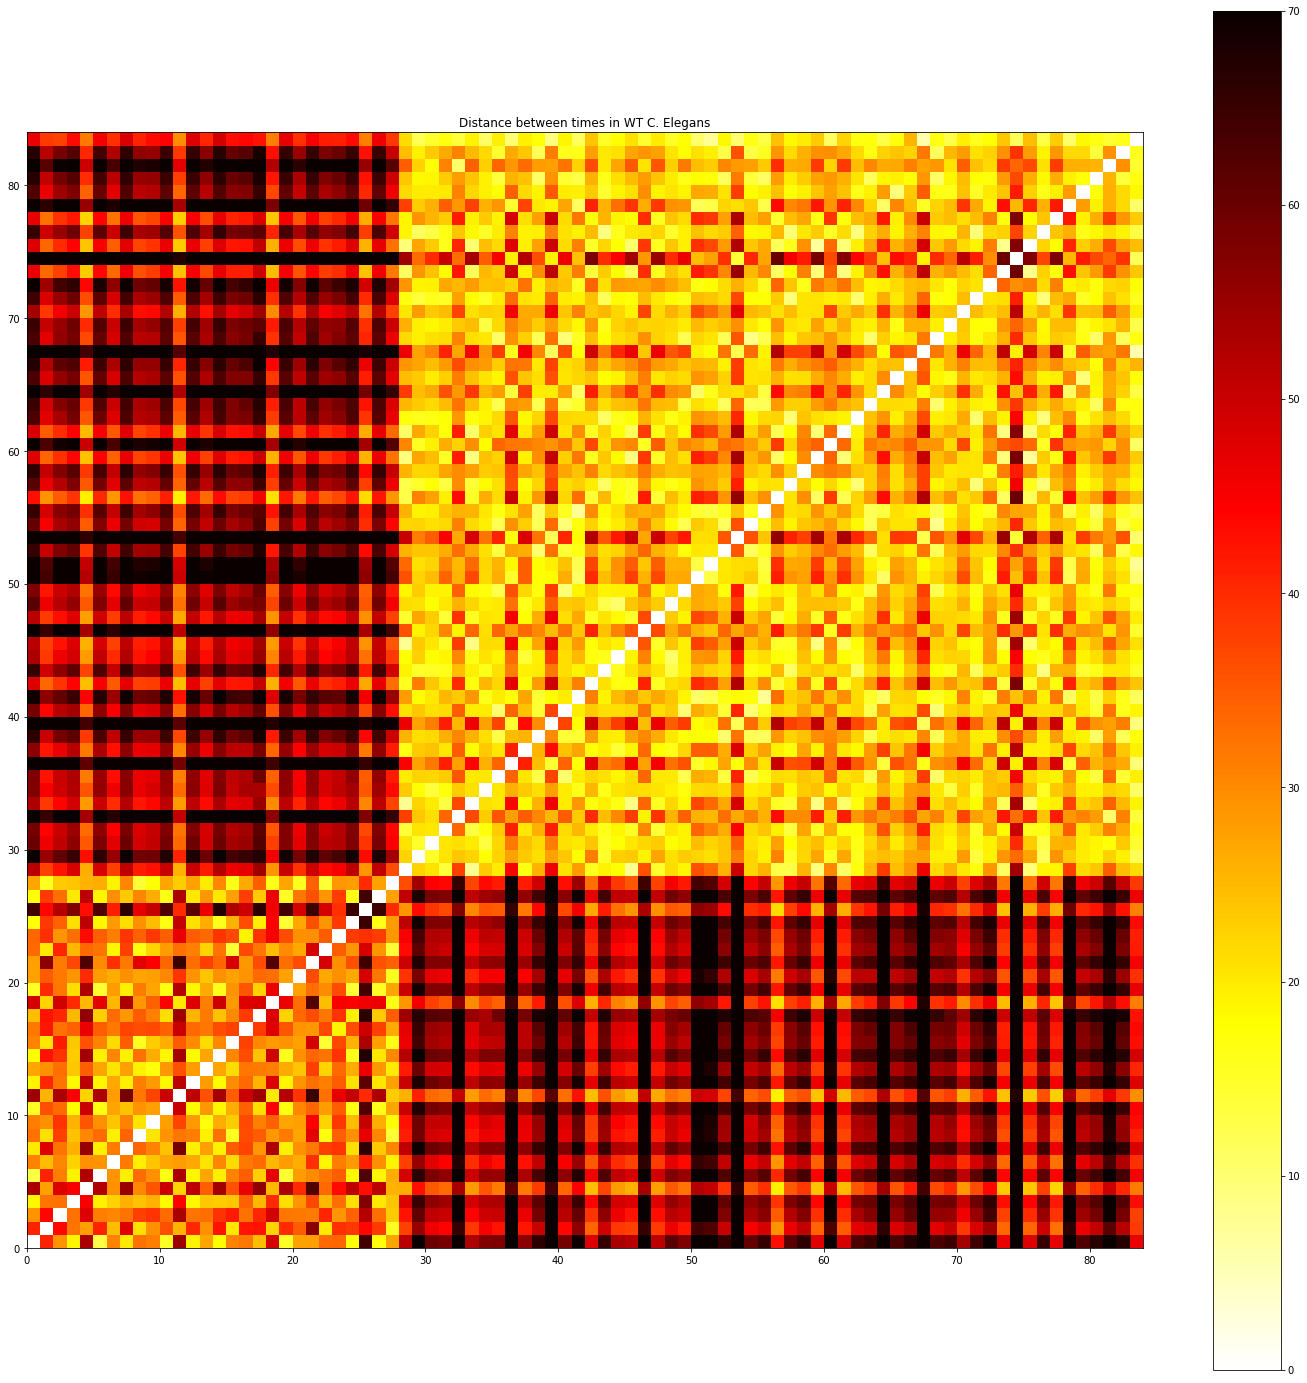

In [244]:


plot_2_examples(['hot_r'],self_b_mat_RNAi_eff[2*len(inlier_ref):14*len(inlier_ref)].T[2*len(inlier_ref):14*len(inlier_ref)])

Significance Tests for glp-1 RNAi for Figure 5E

In [245]:
x = self_b_mat_RNAi_eff[2*len(inlier_ref):3*len(inlier_ref),3*len(inlier_ref):4*len(inlier_ref)].flatten()
y = self_b_mat_RNAi_eff[4*len(inlier_ref):5*len(inlier_ref),5*len(inlier_ref):6*len(inlier_ref)].flatten()

novel_two_sample_permutation_test(x,y, 10000)

0.1254

In [246]:
x = self_b_mat_RNAi_eff[6*len(inlier_ref):7*len(inlier_ref),7*len(inlier_ref):8*len(inlier_ref)].flatten()
y = self_b_mat_RNAi_eff[7*len(inlier_ref):8*len(inlier_ref),8*len(inlier_ref):9*len(inlier_ref)].flatten()
z = self_b_mat_RNAi_eff[8*len(inlier_ref):9*len(inlier_ref),9*len(inlier_ref):10*len(inlier_ref)].flatten()


novel_two_sample_permutation_test(x.tolist() + z.tolist(), y, 10000)

0.4918

In [247]:
z = self_b_mat_RNAi_eff[10*len(inlier_ref):11*len(inlier_ref),11*len(inlier_ref):12*len(inlier_ref)].flatten()
z2 = self_b_mat_RNAi_eff[10*len(inlier_ref):11*len(inlier_ref),12*len(inlier_ref):13*len(inlier_ref)].flatten()
y2 = self_b_mat_RNAi_eff[11*len(inlier_ref):12*len(inlier_ref),13*len(inlier_ref):14*len(inlier_ref)].flatten()
y = self_b_mat_RNAi_eff[12*len(inlier_ref):13*len(inlier_ref),13*len(inlier_ref):14*len(inlier_ref)].flatten()

novel_two_sample_permutation_test(z.tolist() + y.tolist(), z2.tolist() + y2.tolist(),10000)

0.0027

In [ ]:
(Supplemental Figure 6) Code below

In [77]:
inlier_ref = [0,2,3,4,5,6,7,11,12,13,14,15,16,18,21,22,23,24,25,27,28,29]

In [78]:
transformation_assignments = {'APX-1': [('ABp', 'ABa')],
 'ATX-2': [('ABp', 'ABa'),
  ('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABara', 'ABala'),
  ('EMS', 'C')],
 'C49H3.8': [('ABala', 'ABara'), ('P2', 'EMS')],
 'CAMT-1': [('ABar', 'ABal'), ('ABara', 'ABala'), ('ABpra', 'ABpla')],
 'CDC-25.1': [('AB', 'ABp'), ('P1', 'P2')],
 'CDC-37': [('ABala', 'ABara'), ('ABalp', 'ABarp'), ('EMS', 'C'), ('P3', 'C')],
 'CEH-24': [('ABa', 'ABp'),
  ('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABarp', 'ABalp'),
  ('ABpla', 'ABpra')],
 'CHAF-2': [('ABala', 'ABara')],
 'CHK-1': [('ABala', 'ABara')],
 'CLS-2': [('AB', 'ABp')],
 'CPL-1': [('ABar', 'ABal'), ('ABala', 'ABara')],
 'CSN-4': [('ABa', 'ABp')],
 'CUL-1': [('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('MS', 'EMS'),
  ('C', 'EMS'),
  ('P4', 'P3')],
 'CUL-2': [('ABa', 'ABp')],
 'CUL-3': [('ABar', 'ABal'),
  ('ABala', 'ABarp'),
  ('ABpla', 'ABpra'),
  ('ABplp', 'ABpra'),
  ('ABpra', 'ABpla'),
  ('ABprp', 'ABpra')],
 'DIV-1': [('AB', 'ABp'), ('P1', 'P2')],
 'DLC-1': [('ABala', 'ABara')],
 'DLI-1': [('ABala', 'ABara')],
 'DRH-3': [('ABpla', 'ABplp')],
 'F23F1.5': [('ABa', 'ABp')],
 'F35F11.1': [('ABpla', 'ABpra')],
 'F44B9.8': [('EMS', 'C')],
 'GEI-17': [('C', 'MS')],
 'GLD-2': [('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABpra', 'ABpla'),
  ('E', 'MS'),
  ('P4', 'D')],
 'GLP-1': [('ABp', 'ABa'),
  ('ABalp', 'ABarp'),
  ('ABara', 'ABala'),
  ('ABpla', 'ABpra')],
 'GPB-1': [('ABarp', 'ABalp'), ('ABarp', 'ABara')],
 'GSK-3': [('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABpla', 'ABpra'),
  ('E', 'MS'),
  ('C', 'EMS')],
 'HDA-1': [('ABala', 'ABara')],
 'HMP-2': [('ABar', 'ABal')],
 'LAG-1': [('ABp', 'ABa'),
  ('ABalp', 'ABarp'),
  ('ABara', 'ABala'),
  ('ABpla', 'ABpra')],
 'LET-502': [('ABar', 'ABal'), ('ABala', 'ABara'), ('ABpra', 'ABpla')],
 'LIN-23': [('ABar', 'ABal'),
  ('ABpra', 'ABpla'),
  ('MS', 'EMS'),
  ('C', 'EMS'),
  ('P4', 'P3')],
 'MBK-2': [('AB', 'EMS'), ('EMS', 'C')],
 'MEI-1': [('ABar', 'ABal'), ('ABpra', 'ABpla')],
 'MEX-3': [('D', 'P4')],
 'MEX-5': [('AB', 'EMS')],
 'MOM-2': [('ABar', 'ABal'), ('ABpra', 'ABpla'), ('E', 'MS')],
 'MOM-5': [('ABar', 'ABal'), ('ABpra', 'ABpla')],
 'NMY-2': [('ABpla', 'ABpra')],
 'NPP-4': [('ABa', 'ABp'), ('ABpla', 'ABpra')],
 'NUD-1': [('ABala', 'ABara')],
 'OMA-1/2': [('ABar', 'ABal'),
  ('ABalp', 'ABarp'),
  ('ABpra', 'ABpla'),
  ('EMS', 'C')],
 'PAD-1': [('ABpla', 'ABpra')],
 'PAR-2': [('ABp', 'ABa'), ('ABar', 'ABal'), ('P2', 'EMS'), ('E', 'MS')],
 'PAR-3': [('ABar', 'ABal'), ('ABala', 'ABalp;ABara')],
 'PAR-6': [('ABp', 'ABa'),
  ('ABalp', 'ABarp'),
  ('ABara', 'ABala'),
  ('P2', 'EMS'),
  ('E', 'MS')],
 'PIE-1': [('ABp', 'ABa'), ('P2', 'EMS')],
 'PKC-3': [('ABp', 'ABa'), ('ABalp', 'ABarp'), ('P2', 'EMS'), ('E', 'MS')],
 'POP-1': [('ABpla', 'ABpra'), ('MS', 'E')],
 'POS-1': [('ABp', 'ABa'), ('ABar', 'ABal')],
 'PPFR-4': [('ABar', 'ABal'), ('ABpra', 'ABpla')],
 'PUF-3': [('ABar', 'ABal')],
 'RAB-5': [('ABpla', 'ABpra')],
 'RAB-7': [('ABpra', 'ABpla')],
 'RAD-51': [('ABalp', 'ABara')],
 'RAN-4': [('ABa', 'ABp'), ('ABalp', 'ABarp'), ('ABpra', 'ABpla')],
 'RBA-1': [('ABala', 'ABara')],
 'RFC-3': [('AB', 'ABp')],
 'RGA-3': [('ABp', 'ABa'),
  ('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABpla', 'ABpra'),
  ('ABpra', 'ABpla')],
 'RUVB-1': [('ABpla', 'ABpra')],
 'SEL-8': [('ABp', 'ABa'), ('ABalp', 'ABarp'), ('ABara', 'ABala')],
 'SKN-1': [('ABalp', 'ABarp'),
  ('ABara', 'ABala'),
  ('ABpra', 'ABpla'),
  ('EMS', 'C')],
 'SRC-1': [('P4', 'D')],
 'SUF-1': [('ABpla', 'ABpra')],
 'T11G6.8': [('ABalp', 'ABara')],
 'TAG-256': [('ABar', 'ABal'), ('ABpra', 'ABpla')],
 'TAT-5': [('ABar', 'ABal'), ('ABala', 'ABara'), ('ABpra', 'ABpla')],
 'TSR-1': [('EMS', 'C')],
 'UBA-1': [('ABar', 'ABal')],
 'UBC-12': [('ABala', 'ABara'), ('ABarp', 'ABalp')],
 'VPS-4': [('ABala', 'ABara')],
 'WWP-1': [('ABa', 'ABp'), ('ABpla', 'ABpra')],
 'Y53F4B.22': [('ABpla', 'ABpra')],
 'ZYG-11': [('MS', 'EMS')],
 'ZYG-12': [('ABpla', 'ABpra')]}

In [ ]:
RNAi_size_assignments

In [ ]:
RNAi_size_assignments = {'inlierWT': [0,2,3,4,5,6,7,11,12,13,14,15,16,18,21,22,23,24,25,27,28,29],
 'outlierWT': [1, 8, 9, 10, 17, 19, 20, 26]}

for n in range(30,len(fullnameset)):
    q = fullnameset[n].split("/")[-1].split("_")[0]
    print(n,q)
    try:
        RNAi_size_assignments[q].append(n)
    except:
        RNAi_size_assignments[q] = [n]
    #break

In [ ]:
RNAi_size_assignments

In [ ]:
inlier_ref = [0,2,3,4,5,6,7,11,12,13,14,15,16,18,21,22,23,24,25,27,28,29]
WT_lineages_truncated = []
for m in root_cells_comp:
    WT_lineages_truncated_0 = []
    for n in inlier_ref:
        print(n,m)
        WT_lineages_truncated_0.append(node_comparison_trimmer(fulldictset[n],m))
    WT_lineages_truncated.append(WT_lineages_truncated_0)

In [ ]:
diameters = []
for n in root_cells_comp:
    diam_temp = 0
    for m in inlier_ref:
        q = node_comparison_trimmer(fulldictset[m],n)
        for l in inlier_ref:
            r = node_comparison_trimmer(fulldictset[l],n)
            #print(n,m,l)
            diam_temp = max(union_branch_distance(q,r), diam_temp)
    diameters.append(diam_temp)


In [88]:
hits = 0
for n in transformation_assignments:
    print(n,transformation_assignments[n])
    #origin = transformation_assignments[n][0][0]
    #destination = transformation_assignments[n][0][1]

APX-1 [('ABp', 'ABa')]
ATX-2 [('ABp', 'ABa'), ('ABar', 'ABal'), ('ABala', 'ABara'), ('ABara', 'ABala'), ('EMS', 'C')]
C49H3.8 [('ABala', 'ABara'), ('P2', 'EMS')]
CAMT-1 [('ABar', 'ABal'), ('ABara', 'ABala'), ('ABpra', 'ABpla')]
CDC-25.1 [('AB', 'ABp'), ('P1', 'P2')]
CDC-37 [('ABala', 'ABara'), ('ABalp', 'ABarp'), ('EMS', 'C'), ('P3', 'C')]
CEH-24 [('ABa', 'ABp'), ('ABar', 'ABal'), ('ABala', 'ABara'), ('ABarp', 'ABalp'), ('ABpla', 'ABpra')]
CHAF-2 [('ABala', 'ABara')]
CHK-1 [('ABala', 'ABara')]
CLS-2 [('AB', 'ABp')]
CPL-1 [('ABar', 'ABal'), ('ABala', 'ABara')]
CSN-4 [('ABa', 'ABp')]
CUL-1 [('ABar', 'ABal'), ('ABala', 'ABara'), ('MS', 'EMS'), ('C', 'EMS'), ('P4', 'P3')]
CUL-2 [('ABa', 'ABp')]
CUL-3 [('ABar', 'ABal'), ('ABala', 'ABarp'), ('ABpla', 'ABpra'), ('ABplp', 'ABpra'), ('ABpra', 'ABpla'), ('ABprp', 'ABpra')]
DIV-1 [('AB', 'ABp'), ('P1', 'P2')]
DLC-1 [('ABala', 'ABara')]
DLI-1 [('ABala', 'ABara')]
DRH-3 [('ABpla', 'ABplp')]
F23F1.5 [('ABa', 'ABp')]
F35F11.1 [('ABpla', 'ABpra')]
F44

In [89]:
hits = 0
heuristic_transform = dict()
general_transform_list = []
for n in transformation_assignments:
    #print(n)
    for nn in transformation_assignments[n]:
        #print(nn)
        origin = nn[0]
        destination = nn[1]
        if n not in RNAi_size_assignments:
            continue
        #print(n,origin,destination,RNAi_size_assignments[n])
        neighbors = 0
        try:
            thresholds = diameters[root_cells_comp.index(destination)]
        except:
            continue
        heuristic_list = []
        
        
        for pp in RNAi_size_assignments[n]:
            #print(pp)
            RNAi_org_scram = node_comparison_trimmer(fulldictset[pp],origin)
            location = WT_lineages_truncated[root_cells_comp.index(destination)]
            neighbors = 0
            for qq in range(0,len(location)):
                #print(union_branch_distance(RNAi_org_scram, location[qq]), diameters[root_cells_comp.index(destination)])
                neighbors = neighbors + (union_branch_distance(RNAi_org_scram, location[qq]) < diameters[root_cells_comp.index(destination)])
            heuristic_list.append(neighbors)
            general_transform_list.append(neighbors)
            neighbors = 0
        
        if sum(heuristic_list) > 0:
            print(n,origin,destination)
            print(heuristic_list)

APX-1 ABp ABa
[2, 1, 11, 8, 13, 0, 0, 12]
CDC-25.1 AB ABp
[0, 2, 0, 0, 0, 0, 0]
GLP-1 ABp ABa
[0, 2, 0, 0, 0, 0, 10, 0]
GLP-1 ABalp ABarp
[20, 19, 0, 1, 21, 17, 20, 0]
GLP-1 ABara ABala
[3, 22, 0, 0, 13, 0, 8, 0]
GLP-1 ABpla ABpra
[1, 2, 0, 22, 1, 0, 0, 0]
GSK-3 ABar ABal
[22, 0, 0, 0, 10, 22, 0, 0, 0, 0]
GSK-3 ABala ABara
[19, 0, 0, 0, 0, 0, 0, 2, 0, 0]
GSK-3 ABpla ABpra
[20, 19, 0, 0, 0, 21, 0, 0, 0, 0]
LAG-1 ABp ABa
[0, 0, 0, 6, 0, 0, 0, 0]
LAG-1 ABalp ABarp
[0, 1, 21, 22, 0, 0, 21, 0]
LAG-1 ABara ABala
[0, 0, 12, 22, 0, 6, 0, 9]
LAG-1 ABpla ABpra
[0, 15, 0, 22, 0, 0, 1, 0]
MOM-2 ABar ABal
[22, 0, 0, 13, 9, 7, 21, 18]
MOM-2 ABpra ABpla
[8, 0, 0, 7, 0, 0, 0, 13]
MOM-5 ABar ABal
[0, 0, 9, 0, 0, 0, 0, 0, 0]
MOM-5 ABpra ABpla
[0, 0, 6, 0, 0, 0, 0, 0, 0]
PAR-2 ABp ABa
[0, 0, 0, 0, 2, 0]
PAR-2 ABar ABal
[2, 0, 0, 0, 3, 0]
PAR-6 ABalp ABarp
[11, 0, 0, 1, 0]
PAR-6 ABara ABala
[16, 11, 0, 5, 0]
PIE-1 ABp ABa
[0, 0, 1, 0, 0, 0]
POP-1 ABpla ABpra
[14, 22, 16, 10, 6, 12]
POP-1 MS E
[0, 0, 0, 0,

In [90]:
np.count_nonzero(np.array(general_transform_list))

99

In [ ]:
(Supplemental Figure 6B) Figure below

(array([ 9.,  7.,  3.,  0.,  2.,  5.,  2.,  3.,  4.,  4.,  3.,  4.,  4.,
         2.,  3.,  4.,  1.,  3.,  3.,  5., 10., 18.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23]),
 <BarContainer object of 22 artists>)

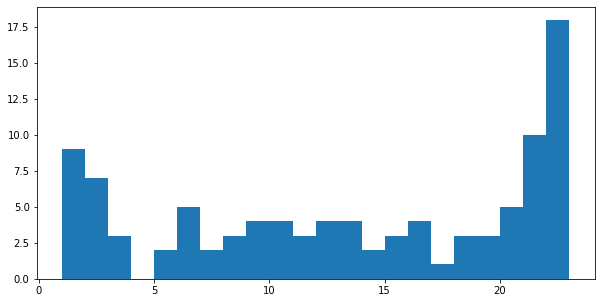

In [91]:
plt.hist(general_transform_list, bins = range(1,24))

In [92]:
WT_lineages_truncated = []
for m in root_cells_comp:
    WT_lineages_truncated_0 = []
    for n in inlier_ref:
        print(n,m)
        WT_lineages_truncated_0.append(node_comparison_trimmer(fulldictset[n],m))
    WT_lineages_truncated.append(WT_lineages_truncated_0)

0 ABa
2 ABa
3 ABa
4 ABa
5 ABa
6 ABa
7 ABa
11 ABa
12 ABa
13 ABa
14 ABa
15 ABa
16 ABa
18 ABa
21 ABa
22 ABa
23 ABa
24 ABa
25 ABa
27 ABa
28 ABa
29 ABa
0 ABp
2 ABp
3 ABp
4 ABp
5 ABp
6 ABp
7 ABp
11 ABp
12 ABp
13 ABp
14 ABp
15 ABp
16 ABp
18 ABp
21 ABp
22 ABp
23 ABp
24 ABp
25 ABp
27 ABp
28 ABp
29 ABp
0 ABal
2 ABal
3 ABal
4 ABal
5 ABal
6 ABal
7 ABal
11 ABal
12 ABal
13 ABal
14 ABal
15 ABal
16 ABal
18 ABal
21 ABal
22 ABal
23 ABal
24 ABal
25 ABal
27 ABal
28 ABal
29 ABal
0 ABar
2 ABar
3 ABar
4 ABar
5 ABar
6 ABar
7 ABar
11 ABar
12 ABar
13 ABar
14 ABar
15 ABar
16 ABar
18 ABar
21 ABar
22 ABar
23 ABar
24 ABar
25 ABar
27 ABar
28 ABar
29 ABar
0 ABpl
2 ABpl
3 ABpl
4 ABpl
5 ABpl
6 ABpl
7 ABpl
11 ABpl
12 ABpl
13 ABpl
14 ABpl
15 ABpl
16 ABpl
18 ABpl
21 ABpl
22 ABpl
23 ABpl
24 ABpl
25 ABpl
27 ABpl
28 ABpl
29 ABpl
0 ABpr
2 ABpr
3 ABpr
4 ABpr
5 ABpr
6 ABpr
7 ABpr
11 ABpr
12 ABpr
13 ABpr
14 ABpr
15 ABpr
16 ABpr
18 ABpr
21 ABpr
22 ABpr
23 ABpr
24 ABpr
25 ABpr
27 ABpr
28 ABpr
29 ABpr
0 ABala
2 ABala
3 ABala
4 ABal

In [93]:
'''
print("Knocked Down Gene, embryo, sublineage, number of WT neighbors, WT neighbor sublineages")
with open('New_Transformations_Found_3.txt', 'a') as f:
    f.write("Knocked Down Gene, embryo, sublineage, number of WT neighbors, WT neighbor sublineages")
    full_counter = []
    for an in range(len(fulldictset))[30:]:
        if an % 50: print(an/len(fulldictset))
        n = fulldictset[an]
        for m in root_cells_comp:
            #if RNAi_name_array[an] in transformation_assignments_format and m in transformation_assignments_format[RNAi_name_array[an]]:
            #    continue
            unperturbed = node_comparison_trimmer(n, m)
            max_val = 0; max_lin = ""
            for nn in range(len(WT_lineages_truncated)):
                counter, bounter = 0,""
                for nnn in range(len(WT_lineages_truncated[0])):
                    ubed = union_branch_distance(unperturbed,WT_lineages_truncated[nn][nnn] )
                    if ubed <= diameters[nn]:
                        counter = counter + 1; bounter = root_cells_comp[nn]
                    #elif ubed >= 2 * diameters[nn]:
                    #    break
                if counter > max_val:
                    max_val = counter; max_lin = bounter
                elif counter == max_val and counter > 0:
                    if isinstance(max_lin, str):
                        max_lin = [max_lin]
                    max_lin.append(bounter)
            #if max_val > 0:
                #pass
                #print(RNAi_name_array[an], "embryo ",an ,"sublineage ",m, "has " ,max_val, "WT neighbors of sublineage" , max_lin)
                #f.write(str(RNAi_name_array[an])+"embryo "+str(an)+" sublineage "+str(m)+" has "+str(max_val)+" WT neighbors of sublineage "+str(max_lin)+"\n")
                #print(str(RNAi_name_array[an])+","+str(an)+","+str(m)+","+str(max_val)+","+str(max_lin)+"\n")
                #f.write(str(RNAi_name_array[an])+","+str(an)+","+str(m)+","+str(max_val)+","+str(max_lin)+"\n")
            full_counter.append(max_val)

'''

Knocked Down Gene, embryo, sublineage, number of WT neighbors, WT neighbor sublineages
0.02214022140221402
0.022878228782287822
0.023616236162361623
0.024354243542435424
0.025092250922509225
0.025830258302583026
0.026568265682656828
0.02730627306273063
0.028044280442804426
0.028782287822878228
0.02952029520295203
0.03025830258302583
0.03099630996309963
0.03173431734317343
0.03247232472324723
0.033210332103321034
0.03394833948339483
0.03468634686346864
0.035424354243542434
0.03616236162361624
0.037638376383763834
0.03837638376383764
0.03911439114391144
0.03985239852398524
0.04059040590405904
0.041328413284132844
0.04206642066420664
0.042804428044280446
0.043542435424354244
0.04428044280442804
0.045018450184501846
0.045756457564575644
0.04649446494464945
0.047232472324723246
0.04797047970479705
0.04870848708487085
0.04944649446494465
0.05018450184501845
0.05092250922509225
0.05166051660516605
0.05239852398523985
0.053136531365313655
0.05387453874538745
0.05461254612546126
0.0553505535055

KeyboardInterrupt: 

In [94]:
print("Knocked Down Gene, embryo, sublineage, number of WT neighbors, WT neighbor sublineages")
with open('New_Transformations_Found_3.txt', 'a') as f:
    f.write("Knocked Down Gene, embryo, sublineage, number of WT neighbors, WT neighbor sublineages")
    full_counter = []
    for an in range(len(fulldictset))[30:]:
        if an % 50: print(an/len(fulldictset))
        n = fulldictset[an]
        for m in root_cells_comp:
            #if RNAi_name_array[an] in transformation_assignments_format and m in transformation_assignments_format[RNAi_name_array[an]]:
            #    continue
            unperturbed = node_comparison_trimmer(n, m)
            max_val = 0; max_lin = ""
            for nn in range(len(WT_lineages_truncated)):
                counter, bounter = 0,""
                for nnn in range(len(WT_lineages_truncated[0])):
                    ubed = union_branch_distance(unperturbed,WT_lineages_truncated[nn][nnn] )
                    if ubed <= diameters[nn]:
                        counter = counter + 1; bounter = root_cells_comp[nn]
                    elif ubed >= 2 * diameters[nn]:
                        break
                if counter > max_val:
                    max_val = counter; max_lin = bounter
                elif counter == max_val and counter > 0:
                    if isinstance(max_lin, str):
                        max_lin = [max_lin]
                    max_lin.append(bounter)
            #if max_val > 0:
                #pass
                #print(RNAi_name_array[an], "embryo ",an ,"sublineage ",m, "has " ,max_val, "WT neighbors of sublineage" , max_lin)
                #f.write(str(RNAi_name_array[an])+"embryo "+str(an)+" sublineage "+str(m)+" has "+str(max_val)+" WT neighbors of sublineage "+str(max_lin)+"\n")
                #print(str(RNAi_name_array[an])+","+str(an)+","+str(m)+","+str(max_val)+","+str(max_lin)+"\n")
                #f.write(str(RNAi_name_array[an])+","+str(an)+","+str(m)+","+str(max_val)+","+str(max_lin)+"\n")
            full_counter.append(max_val)

            #print()

Knocked Down Gene, embryo, sublineage, number of WT neighbors, WT neighbor sublineages
0.02214022140221402
0.022878228782287822
0.023616236162361623
0.024354243542435424
0.025092250922509225
0.025830258302583026
0.026568265682656828
0.02730627306273063
0.028044280442804426
0.028782287822878228
0.02952029520295203
0.03025830258302583
0.03099630996309963
0.03173431734317343
0.03247232472324723
0.033210332103321034
0.03394833948339483
0.03468634686346864
0.035424354243542434
0.03616236162361624
0.037638376383763834
0.03837638376383764
0.03911439114391144
0.03985239852398524
0.04059040590405904
0.041328413284132844
0.04206642066420664
0.042804428044280446
0.043542435424354244
0.04428044280442804
0.045018450184501846
0.045756457564575644
0.04649446494464945
0.047232472324723246
0.04797047970479705
0.04870848708487085
0.04944649446494465
0.05018450184501845
0.05092250922509225
0.05166051660516605
0.05239852398523985
0.053136531365313655
0.05387453874538745
0.05461254612546126
0.0553505535055

0.3461254612546125
0.34686346863468637
0.34760147601476016
0.34833948339483395
0.34907749077490774
0.34981549815498153
0.3505535055350554
0.35129151291512917
0.35202952029520296
0.35276752767527675
0.35350553505535054
0.35424354243542433
0.3549815498154982
0.35571955719557197
0.35645756457564576
0.35719557195571955
0.35793357933579334
0.3586715867158672
0.359409594095941
0.36014760147601477
0.36088560885608856
0.36162361623616235
0.36236162361623614
0.36309963099631
0.3638376383763838
0.36457564575645757
0.36531365313653136
0.36605166051660515
0.36678966789667894
0.3675276752767528
0.3682656826568266
0.36974169741697416
0.37047970479704795
0.3712177121771218
0.3719557195571956
0.3726937269372694
0.37343173431734317
0.37416974169741696
0.37490774907749075
0.3756457564575646
0.3763837638376384
0.3771217712177122
0.37785977859778597
0.37859778597785976
0.3793357933579336
0.3800738007380074
0.3808118081180812
0.381549815498155
0.38228782287822877
0.38302583025830256
0.3837638376383764
0.38

0.6730627306273063
0.67380073800738
0.6745387453874538
0.6752767527675276
0.6760147601476014
0.6767527675276753
0.6774907749077491
0.6782287822878229
0.6789667896678967
0.6797047970479705
0.6804428044280443
0.6811808118081181
0.6819188191881919
0.6826568265682657
0.6833948339483394
0.6841328413284132
0.6848708487084871
0.6856088560885609
0.6863468634686347
0.6870848708487085
0.6878228782287823
0.6885608856088561
0.6892988929889299
0.6900369003690037
0.6907749077490775
0.6915129151291513
0.692250922509225
0.6929889298892989
0.6937269372693727
0.6944649446494465
0.6952029520295203
0.6959409594095941
0.6966789667896679
0.6974169741697417
0.6981549815498155
0.6988929889298893
0.6996309963099631
0.7003690036900369
0.7018450184501845
0.7025830258302583
0.7033210332103321
0.7040590405904059
0.7047970479704797
0.7055350553505535
0.7062730627306273
0.7070110701107011
0.7077490774907749
0.7084870848708487
0.7092250922509226
0.7099630996309964
0.7107011070110701
0.7114391143911439
0.7121771217712

In [95]:
full_counter.count(0)

24691

In [ ]:
(Supplemental Figure 6C) Figure below

(array([503., 190., 105., 103.,  62.,  79.,  68., 103.,  72.,  75.,  53.,
         90.,  79.,  73.,  85.,  67.,  69.,  78.,  77., 155., 248., 700.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23]),
 <BarContainer object of 22 artists>)

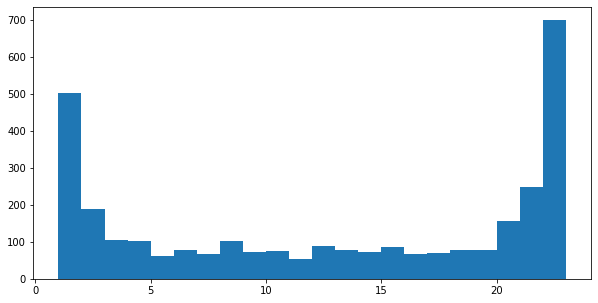

In [96]:
plt.hist(full_counter, bins = range(1,24))